### Check whether the pre-processed data has been de-meaned

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_dir = '/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/'
data = np.loadtxt(f"{data_dir}100206.txt")
print(data.shape)

(4800, 15)


In [14]:
print(np.std(data[:1200,5]))
print(np.std(data[1200:2400,5]))
print(np.std(data[2400:3600,5]))
print(np.std(data[3600:4800,5]))

73.97078169525533
71.50405805815484
59.740868684702896
60.80229374610422


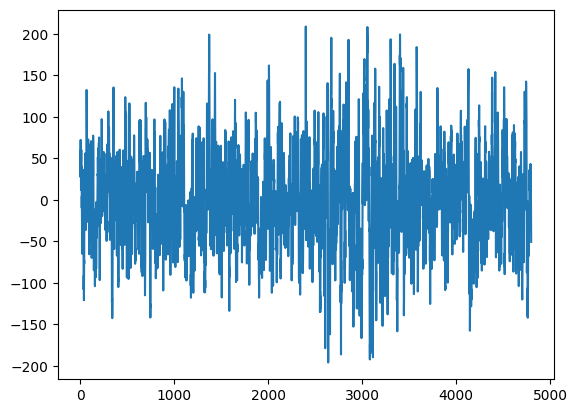

In [7]:
plt.plot(np.squeeze(data[:,0]))

So we need to z-score each session (1200 time points). Let's write a function for this!

In [72]:
def z_score(data:np.ndarray,n_session:int = 1):
    """
    z_score the input data.
    If n_session = 1, then z_score directly
    If n_session > 1, then divide the data into different sessions,
    z-score separately, and then concatenate back.
    
    Parameters:
    data (np.ndarray): (n_timepoints,n_channel)
    n_session (int): the number of sessions
    
    Returns
    np.ndarray: z-scored data
    """
    import scipy.stats as stats
    
    if n_session == 1:
        return stats.zscore(data,axis=0)
    else:
        if len(data) % n_session > 0:
            raise ValueError('Number of time points is not divisible by n_session!')
        n_timepoint, n_channel = data.shape
        
        #  Split to n sessions
        data = np.reshape(data,(n_session,-1,n_channel))
        
        # z-score
        data = stats.zscore(data,axis=1)
        
        # Concatenate and reshape
        return np.reshape(data,(n_timepoint,n_channel))
        
        

In [79]:
def test_z_score():
    import numpy as np
    import numpy.testing as npt
    
    # Example 1: one session
    x = np.array([[0.5,1.5,2.5],[-2.0,-1.0,0.0]]).T
    y = z_score(x)
    npt.assert_equal(y[:,0], y[:,1])
    
    # Example 2: two sessions
    np.random.seed(42)
    x1 = np.random.normal(loc=100.0,scale=100.0,size=(100,2))
    x2 = np.random.normal(loc=0.0,scale=2.0,size=(100,2))
    x = np.concatenate([x1,x2])
    y = z_score(x,n_session=2)
    
    # Check the data are z-scored
    npt.assert_almost_equal(np.mean(y[:100,:]),0.0,decimal=3)
    npt.assert_almost_equal(np.std(y[:100,:]),1.0,decimal=3)
    npt.assert_almost_equal(np.mean(y[100:,:]),0.0,decimal=3)
    npt.assert_almost_equal(np.std(y[100:,:]),1.0,decimal=3)
    

In [80]:
test_z_score()

### Write a function to load data

In [81]:
import pathlib
from osl_dynamics.data import Data
class PrepareData():
    def __init__(self,data_dir:pathlib.Path,n_session:int=4):
        self.data_dir = data_dir
        self.n_session = n_session
        
    def load(self,):
        '''
        Load data from specified directories
        Returns:
        tuple: A tuple containing the following
            - subjs (list): A list of read-in subjects
            - dataset (osl_dynamics.data.Data): the wrappeed dataset
        '''
        subjs = []
        data_list = []
        for file in self.data_dir.glob('*.txt'):
            subjs.append(file.stem)
            data_list.append(z_score(np.loadtxt(file),self.n_session))
        
        print('Read from directory: ',self.data_dir)
        print('Number of subjects: ',len(subjs))
        
        return subjs, Data(data_list)

/home/fs0/lmh182/.conda/envs/osld/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [83]:
import pathlib
data_dir = pathlib.Path('/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/')
prepare_data = PrepareData(data_dir)
subjs, dataset = prepare_data.load()

Read from directory:  /vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2
Number of subjects:  1003


Loading files: 100%|██████| 1003/1003 [00:13<00:00, 76.75it/s]


In [84]:
print(len(subjs))

1003


Attention: We need to sort the input files otherwise something would go wrong. Let's give it a try here!

In [90]:
data_dir = pathlib.Path('/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/')

In [91]:
print(data_dir.glob('*.txt'))

<generator object Path.glob at 0x7f3ce767b120>


In [93]:
for file in sorted(data_dir.glob('*.txt')):
    print(file)

/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/100206.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/100307.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/100408.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/100610.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/101006.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/101107.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/101309.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/101915.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/102008.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/102109.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/102311.txt
/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll

In [94]:
1118 / 4

279.5

In [99]:
x = np.reshape(np.arange(24),(6,4))
print(x)
print('####################')
y = np.split(x,3)
print(y)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
####################
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]]), array([[16, 17, 18, 19],
       [20, 21, 22, 23]])]


In [3]:
stats.zscore(np.array([-1,1]))

NameError: name 'stats' is not defined

In [10]:
import numpy as np
import numpy.testing as npt

def test_prepare_data():
    import shutil, os
    import pathlib
    from rotation.preprocessing import PrepareData
    temp_dir = './test_temp/'
    # Create the directory if not exists
    if not os.path.exists(temp_dir):
        print(f'Create the temporary directory {temp_dir}')
        os.makedirs(temp_dir)
    
    # Create a subject
    subj_name = '10001'
    data = np.array([[-1,1,-1,1],[1,-1,1,-1]]).T
    np.savetxt(f'{temp_dir}{subj_name}.txt', data)
    
    # Use the PrepareData class
    prepare_data = PrepareData(pathlib.Path(temp_dir),2)
    subj,result = prepare_data.load()
    npt.assert_equal(subj[0],'10001')
    npt.assert_equal(result[0],np.array([[-1,1],[1,-1]]))
    npt.assert_equal(result[1],np.array([[-1,1],[1,-1]]))
    
    # Delete the directory
    if os.path.exists(temp_dir):
        shutil.rmtree(temp_dir)
        print(f'Delete temporary directory {temp_dir}')

In [11]:
test_prepare_data()

Create the temporary directory ./test_temp/
Read from directory:  test_temp
Number of subjects:  1
Delete temporary directory ./test_temp/


In [14]:
4800 * 300 * 1003

1444320000

In [15]:
4000 * 300 * 300 * 1200

432000000000

### training on HMM

In [ ]:
def HMM_training(dataset,n_states,n_channels,save_dir):
    from osl_dynamics.models.hmm import Config, Model
    # Create a config object
    config = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=600,
        learn_means=True,
        learn_covariances=True,
        batch_size=32,
        learning_rate=1e-3,
        n_epochs=40,
    )
    
    # Initiate a Model class and print a summary
    model = Model(config)
    model.summary()
    
    # Initialization
    init_history = model.random_state_time_course_initialization(training_data, n_epochs=1, n_init=3)
    
    # Full training
    history = model.fit(training_data)
    model.save(save_dir)

## Post-training analysis

### Question: What does the model look like?

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

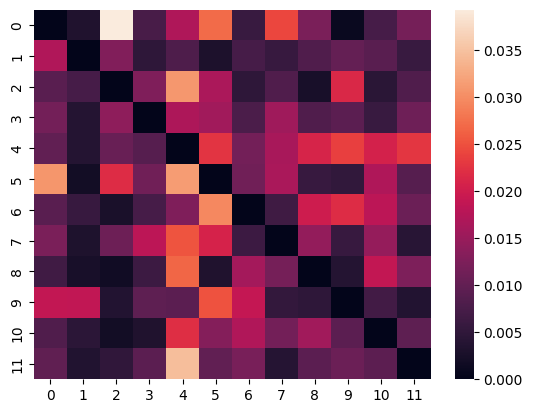

In [21]:
result_dir = './results/'
result_1_dir = f'{result_dir}HMM_ICA_15_state_12/'
trans_prob = np.load(f'{result_1_dir}trans_prob.npy')
np.fill_diagonal(trans_prob,0)
seaborn.heatmap(trans_prob)
plt.show()

In [22]:
import yaml
with open(f'{result_1_dir}config.yml','r') as file:
    config = yaml.safe_load(file)
    
print(config)

{'batch_size': 32, 'covariances_epsilon': 1e-06, 'covariances_regularizer': None, 'diagonal_covariances': False, 'gradient_clip': None, 'initial_covariances': None, 'initial_means': None, 'initial_trans_prob': None, 'learn_covariances': True, 'learn_means': True, 'learn_trans_prob': True, 'learning_rate': 0.001, 'means_regularizer': None, 'model_name': 'HMM', 'multi_gpu': False, 'multiple_dynamics': False, 'n_channels': 15, 'n_epochs': 40, 'n_modes': None, 'n_states': 12, 'observation_update_decay': 0.1, 'optimizer': 'adam', 'sequence_length': 600, 'state_probs_t0': None, 'strategy': None, 'trans_prob_update_delay': 5, 'trans_prob_update_forget': 0.7}


### Question: how to load the model and infer the hidden states?

In [23]:
from osl_dynamics.models import load

model = load(result_1_dir)

2023-07-10 14:49:54 INFO osl-dynamics [mod_base.py:485:load]: Loading model: ./results/HMM_ICA_15_state_12/


In [24]:
import pathlib
from rotation.preprocessing import PrepareData
n_channels = 15
data_dir = pathlib.Path(f'/vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d{n_channels}_ts2/')
prepare_data = PrepareData(data_dir)
subj,dataset = prepare_data.load()
    
alpha = model.get_alpha(dataset)

Read from directory:  /vols/Data/HCP/Phase2/group1200/node_timeseries/3T_HCP1200_MSMAll_d15_ts2
Number of subjects:  1003


Loading files: 100%|█████| 4012/4012 [00:29<00:00, 136.52it/s]
2023-07-10 14:50:57 INFO osl-dynamics [hmm.py:1093:get_alpha]: Getting alpha
2023-07-10 14:50:57.301349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:03 INFO numba.core.transforms [transforms.py:58:_extract_loop_lifting_candidates]: finding looplift candidates
2023-07-10 14:51:05.718853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:05.971241: I tensorflow

2023-07-10 14:51:16.227648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:16.857340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:17.421342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:51:28.035225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:28.372031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:28.610290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:51:39.814941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:40.366794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:41.028605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:51:52.982565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:53.365637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:51:53.864192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:52:05.623308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:06.129105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:06.540725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:52:16.955174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:17.629527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:18.191423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:52:27.870218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:28.284571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:28.622601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:52:36.543952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:37.114423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:37.627824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:52:45.414560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:45.655916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:45.895600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:52:53.659843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:54.238366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:52:54.911754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:53:04.422015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:04.659115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:04.894723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:53:14.128828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:14.728812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:15.335146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:53:22.737688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:22.987227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:23.309887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:53:30.619117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:30.882907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:31.148365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:53:39.063680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:39.509478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:39.880748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:53:50.073229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:50.697802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:53:51.360161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:54:02.121476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:02.429683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:02.728643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:54:13.173047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:13.702200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:13.952903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:54:22.843552: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:23.502980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:24.130020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:54:35.192506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:35.445920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:35.707039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:54:46.330705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:47.018921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:47.610421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:54:57.435497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:57.685069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:54:57.926999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:55:07.953815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:08.210921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:08.841260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:55:18.909897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:19.220937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:19.478259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:55:31.232387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:31.477754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:32.058577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:55:40.329653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:40.585091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:41.094621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:55:49.197203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:49.455436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:55:49.721055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:56:01.472225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:01.870994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:02.632931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:56:11.618003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:12.100868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:12.535209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:56:23.958863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:24.357158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:24.708329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:56:33.528099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:34.216005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:34.882885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:56:45.905320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:46.476400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:47.133962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:56:57.231367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:57.870271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:56:58.352148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:57:09.162260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:09.592389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:09.959155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:57:18.362865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:19.034060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:19.603894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:57:29.208222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:29.796459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:30.272675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:57:40.123238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:40.576599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:40.958105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:57:50.365974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:51.005923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:57:51.569306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:58:00.996527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:01.424300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:02.115866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:58:09.366426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:09.620271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:10.193879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:58:16.228036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:16.469089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:16.709533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:58:25.088989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:25.594226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:26.007576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:58:35.963652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:36.343538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:36.676928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:58:44.721583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:45.022620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:45.299158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:58:52.165535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:52.418520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:58:52.661227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:59:02.640380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:03.199823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:03.439790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:59:10.558340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:11.003149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:11.381182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:59:19.219041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:19.839524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:20.329550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:59:29.477262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:29.939076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:30.321974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:59:36.223833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:36.859683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:37.425096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:59:47.650796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:47.908042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:48.149407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 14:59:56.011716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:56.672016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:59:57.196891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:00:03.729750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:03.972191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:04.239918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:00:14.135438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:14.713188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:14.971259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:00:22.408532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:22.648391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:23.219484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:00:32.177278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:32.418977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:32.662840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:00:44.605389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:45.262178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:45.801596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:00:56.183445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:56.435956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:00:56.684767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:01:08.005268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:08.357219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:09.043570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:01:20.735159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:20.982843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:21.232959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:01:30.020542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:30.421027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:31.095214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:01:40.642190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:41.226036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:41.471694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:01:50.445971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:50.740616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:50.994344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:01:59.224348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:59.472542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:01:59.719825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:02:10.369353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:11.033152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:11.696241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:02:18.930768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:19.178071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:19.423079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:02:27.165234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:27.733184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:27.981381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:02:36.719682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:36.978493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:37.230622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:02:47.651505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:48.097776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:48.512431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:02:57.890490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:58.378402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:02:59.032197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:03:07.642078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:07.890586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:08.135112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:03:19.198941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:19.454770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:20.149610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:03:29.457198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:29.738497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:30.431297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:03:39.451684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:39.718065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:40.399374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:03:50.519799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:50.889213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:03:51.214905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:03:59.964132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:00.210022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:00.461947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:04:10.449597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:10.696370: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:11.252190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:04:20.449169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:20.693073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:20.935353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:04:30.415988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:30.783677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:31.029002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:04:38.834696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:39.090181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:39.333001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:04:48.532462: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:48.991371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:49.382095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:04:58.682554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:59.243775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:04:59.490190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:05:08.349296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:08.964917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:09.584546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:05:17.870459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:18.561432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:19.234729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:05:27.464789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:27.710283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:27.955686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:05:36.059934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:36.433298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:36.853932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:05:48.315233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:48.576861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:48.832852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:05:56.480904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:56.724077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:05:56.967805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:06:05.703808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:05.943687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:06.187642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:06:15.582939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:16.205122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:16.446138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:06:24.884520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:25.274817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:25.887774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:06:34.086398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:34.332026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:34.575091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:06:42.544314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:43.203974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:43.456450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:06:51.485773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:51.751699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:06:51.992600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:07:03.738690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:04.083595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:04.655524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:07:13.704355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:13.952188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:14.200104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:07:23.935991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:24.627332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:25.232828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:07:35.495509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:36.181649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:36.433976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:07:45.681489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:46.133655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:46.712674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:07:53.902335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:54.153501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:07:54.397037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:08:02.628992: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:02.874417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:03.114121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:08:10.481392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:10.717654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:10.961311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:08:19.682395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:20.248880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:20.492248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:08:28.794657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:29.062780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:29.317046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:08:37.444309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:38.053805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:38.703626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:08:49.023136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:49.571783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:08:50.145338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:08:59.725285: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:00.366138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:01.047873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:09:09.611015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:10.155384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:10.581180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:09:20.347532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:20.610653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:20.856165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:09:29.969161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:30.213889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:30.456012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:09:40.973989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:41.338347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:41.583174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:09:50.263994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:50.500493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:09:50.744599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:09:59.667911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:00.205209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:00.455867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:10:09.595611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:09.980348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:10.458263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:10:18.624367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:19.063036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:19.528282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:10:26.148091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:26.805954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:27.407330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:10:34.164482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:34.417653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:34.662006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:10:42.570757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:43.212960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:43.458788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:10:49.246555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:49.506362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:49.757207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:10:58.886221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:59.523612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:10:59.862971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:11:07.426467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:08.102523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:08.732284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:11:17.737702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:17.988266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:18.239306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:11:25.152203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:25.394283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:25.634498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:11:34.139439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:34.422518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:34.671649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:11:42.692829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:42.951731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:43.198993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:11:52.062718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:52.374167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:11:52.657442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:12:00.716899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:00.960611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:01.202883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:12:09.259908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:09.500363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:09.828031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:12:19.438809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:19.704343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:20.276242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:12:26.699241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:26.951905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:27.648071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:12:37.731887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:37.984518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:38.277092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:12:48.212677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:48.906218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:49.592504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:12:58.927515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:12:59.436398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:00.028178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:13:11.161343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:11.441978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:11.737252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:13:20.616672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:21.160534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:21.721540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:13:30.535428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:30.995744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:31.372437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:13:40.207637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:40.457671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:40.704122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:13:48.457189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:48.705261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:48.948216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:13:57.750721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:58.377776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:13:58.870801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:14:07.213369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:07.463868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:07.717513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:14:16.980954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:17.586784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:18.219947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:14:25.942300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:26.187549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:26.430539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:14:34.103461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:34.727212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:34.967345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:14:46.075381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:46.718572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:46.966629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:14:57.356947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:57.854644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:14:58.264150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:15:05.965512: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:06.294818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:06.577819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:15:17.214728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:17.861222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:18.491336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:15:27.229111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:27.864793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:28.298241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:15:38.847947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:39.427412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:40.056939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:15:46.702683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:46.941621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:47.186901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:15:57.128903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:57.672191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:15:58.088442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:16:09.021593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:09.431166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:10.087511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:16:17.192837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:17.720609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:17.962321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:16:27.407406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:28.008666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:28.585126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:16:37.253200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:37.516146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:37.905446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:16:46.854933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:47.243147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:47.554808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:16:56.277931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:56.670153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:16:57.255382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:17:06.610389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:07.059521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:07.644783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:17:16.665390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:17.088333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:17.442406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:17:26.226873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:26.468889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:26.737041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:17:36.760850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:37.014957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:37.684082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:17:47.637713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:48.207087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:17:48.753875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:18:01.607604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:02.239867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:02.495684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:18:13.310917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:13.798786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:14.202952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:18:23.728489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:24.058890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:24.717492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:18:32.674840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:33.298403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:33.935601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

2023-07-10 15:18:44.460900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:45.079574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1200,15]
	 [[{{node Placeholder/_0}}]]
2023-07-10 15:18:45.758030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1

In [25]:
type(alpha)

list

In [26]:
type(alpha[0])

numpy.ndarray

In [27]:
alpha[0].shape

(1200, 12)

In [28]:
len(alpha)

4012

In [29]:
import pickle
pickle.dump(alpha, open(f'{result_1_dir}alpha.pkl', "wb"))

In [30]:
alpha[0]

array([[2.9256483e-04, 2.1780960e-03, 6.2531843e-03, ..., 2.4948446e-03,
        7.9063408e-04, 3.1569682e-04],
       [1.4581109e-05, 8.3765259e-04, 5.9707104e-03, ..., 1.4968008e-03,
        1.6649136e-03, 1.2321266e-05],
       [1.1396520e-05, 6.6842531e-06, 7.3152315e-04, ..., 8.4383806e-05,
        7.1660667e-03, 5.6155511e-07],
       ...,
       [7.1074951e-01, 4.1825572e-08, 3.1663360e-05, ..., 4.8747900e-04,
        1.8685320e-09, 5.9881685e-08],
       [8.2679802e-01, 7.4637230e-09, 2.7055499e-05, ..., 8.5863030e-07,
        2.5648489e-10, 2.9916586e-10],
       [9.1423517e-01, 7.6308275e-08, 4.1581033e-04, ..., 2.3310297e-06,
        1.9075143e-08, 2.3776222e-07]], dtype=float32)

In [35]:
alpha[0][300,:]

array([2.2677984e-10, 1.9777464e-07, 3.3698305e-07, 1.0830148e-06,
       9.6019214e-08, 5.5629685e-06, 9.5552868e-01, 1.8513897e-06,
       2.0398751e-08, 4.4461805e-02, 1.4254192e-08, 3.5274979e-07],
      dtype=float32)

### Understanding summary statistics

In [36]:
print(type(alpha))

<class 'list'>


(<Figure size 1200x250 with 2 Axes>, [<Axes: xlabel='Sample'>])

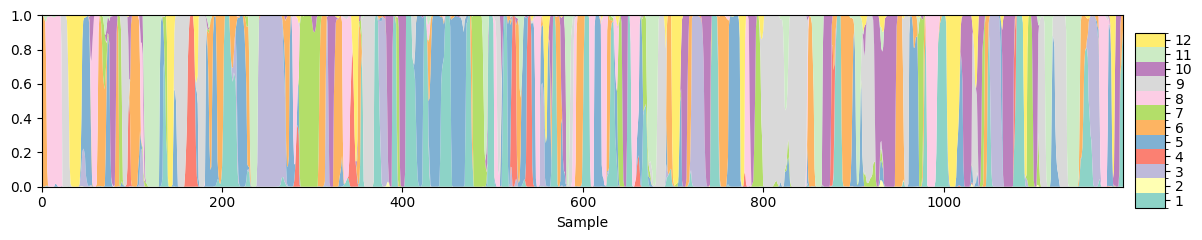

In [37]:
from osl_dynamics.utils import plotting

# Plot the state probability time course for the first subject
plotting.plot_alpha(alpha[0],n_samples=1200)

(<Figure size 1200x250 with 2 Axes>, [<Axes: xlabel='Sample'>])

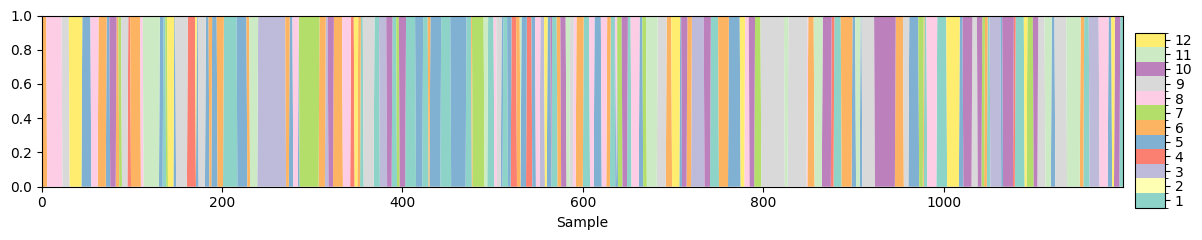

In [38]:
from osl_dynamics.inference import modes

# Hard classify the state probabilities
stc = modes.argmax_time_courses(alpha)
plotting.plot_alpha(stc[0],n_samples=1200)

### Fractional occupancy

In [39]:
# Calculate fractional occupancies
fo = modes.fractional_occupancies(stc)
print(fo.shape)

(4012, 12)


In [40]:
import numpy as np
print(np.mean(fo,axis=0))

[0.07360523 0.06035041 0.08186378 0.06777231 0.11493582 0.09527522
 0.07094965 0.07823488 0.09277812 0.0869288  0.09690512 0.08040067]


(<Figure size 700x400 with 1 Axes>, <Axes: xlabel='State', ylabel='FO'>)

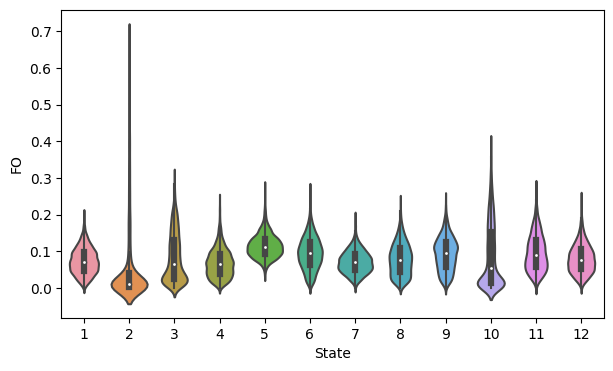

In [41]:
# Plot the distribution of fractional occupancy (FO) across subjects
plotting.plot_violin(fo.T, x_label="State", y_label="FO")

### Mean Lifetime

[4.67132269 4.79102603 5.32466506 6.06323505 4.45195085 4.54564241
 5.22813657 5.37935488 6.70049335 4.94312067 6.28557787 6.32329685]


(<Figure size 700x400 with 1 Axes>,
 <Axes: xlabel='State', ylabel='Mean Lifetime (s)'>)

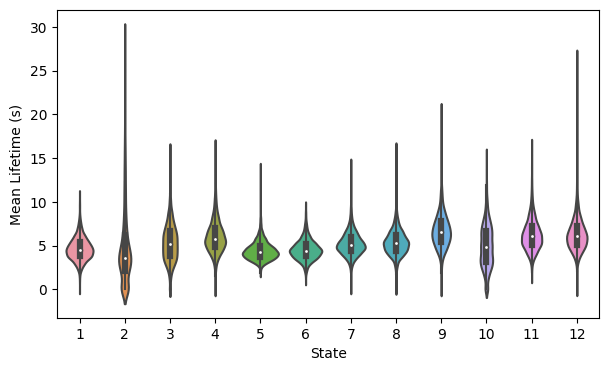

In [42]:
# Calculate mean lifetimes (in seconds)
mlt = modes.mean_lifetimes(stc, sampling_frequency=1/0.72)

# Convert to ms
#mlt *= 1000

# Print the group average
print(np.mean(mlt, axis=0))

# Plot distribution across subjects
plotting.plot_violin(mlt.T, x_label="State", y_label="Mean Lifetime (s)")

### Mean Interval


[65.76852283 95.07600701 92.34632847 98.83552669 35.05508174 52.21079136
 73.15320108 80.92260451 77.35193795 89.73243718 69.88843844 81.15131273]


(<Figure size 700x400 with 1 Axes>,
 <Axes: xlabel='State', ylabel='Mean Interval (s)'>)

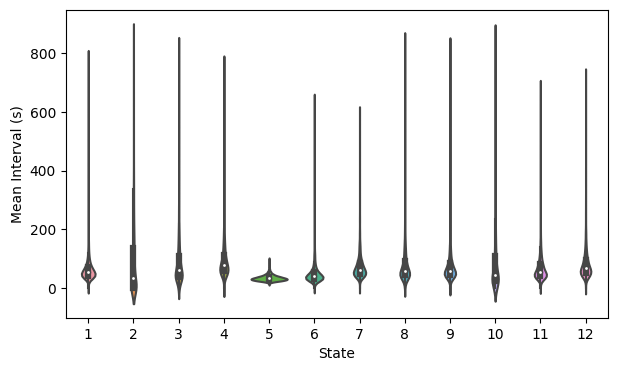

In [43]:
# Calculate mean intervals (in seconds)
mintv = modes.mean_intervals(stc, sampling_frequency=1/0.72)

# Print the group average
print(np.mean(mintv, axis=0))

# Plot distribution across subjects
plotting.plot_violin(mintv.T, x_label="State", y_label="Mean Interval (s)")

In [44]:
50 * 50 *126 * 405

127575000

In [45]:
4012 * 300 * 300 * 1116

402965280000

In [46]:
50 * 49 / 2

1225.0

The partition is:  {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 2, 6: 2, 7: 0, 8: 1, 9: 1, 10: 2, 11: 0, 12: 0, 13: 0, 14: 1, 15: 1, 16: 2, 17: 0, 18: 1, 19: 0, 20: 1, 21: 0, 22: 1, 23: 3, 24: 3, 25: 3, 26: 1, 27: 3, 28: 3, 29: 1, 30: 1, 31: 3, 32: 1, 33: 1}


/tmp/slurm-22854570/ipykernel_336595/3638768981.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


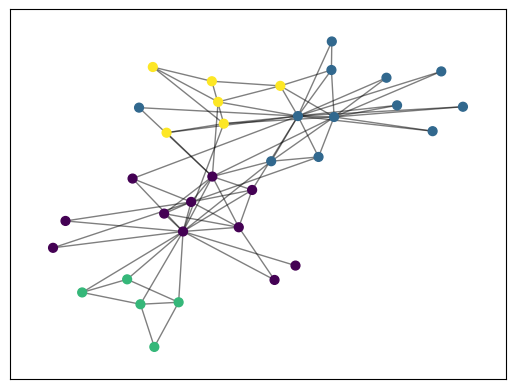

In [1]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# load the karate club graph
G = nx.karate_club_graph()

# compute the best partition
partition = community_louvain.best_partition(G)

print('The partition is: ',partition)
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [2]:
import numpy as np
data_dir = './results/HMM_ICA_100_state_12/'
tpm = np.load(f'{data_dir}trans_prob.npy')
print(tpm)

[[8.49689927e-01 2.15284653e-02 1.19195069e-02 1.54485338e-05
  2.77014542e-12 1.37034552e-02 2.02857930e-02 2.61173983e-02
  1.73635491e-02 6.59600873e-03 1.27933011e-02 1.99871467e-02]
 [4.79083359e-02 8.55376697e-01 1.15627801e-02 5.28669526e-04
  6.66584300e-03 4.93814862e-03 2.43874492e-02 9.30345589e-03
  1.21323045e-02 6.77407477e-03 8.57175995e-03 1.18504817e-02]
 [1.41233283e-02 1.05032523e-02 8.93749375e-01 2.29123417e-04
  1.10931641e-03 1.79559309e-02 1.45212626e-02 3.50934095e-03
  2.47075221e-02 5.19086912e-05 4.80684142e-03 1.47327976e-02]
 [1.57715744e-04 1.53065570e-03 2.94738585e-04 9.41656736e-01
  3.34574605e-02 1.69650598e-03 4.35216258e-04 9.58674644e-04
  4.30217763e-04 1.86982730e-02 3.41186259e-05 6.49687266e-04]
 [1.06665419e-35 1.02306734e-02 2.93840760e-03 2.77247536e-02
  8.50642440e-01 1.25564639e-02 2.22954519e-03 3.92910590e-03
  2.33229645e-03 6.23344522e-02 2.32952751e-02 1.78658685e-03]
 [1.65657802e-02 4.95731722e-03 1.57759241e-02 1.20766136e-03
  7

In [6]:
# For directed weighted graph
G = nx.DiGraph()

for i in range(len(tpm)):
    G.add_node(i)  # Add nodes to the graph

    for j in range(i + 1, len(tpm)):
        weight = tpm[i][j]

        if weight > 0:
            G.add_edge(i, j, weight=weight)  # Add edge with weight to the graph

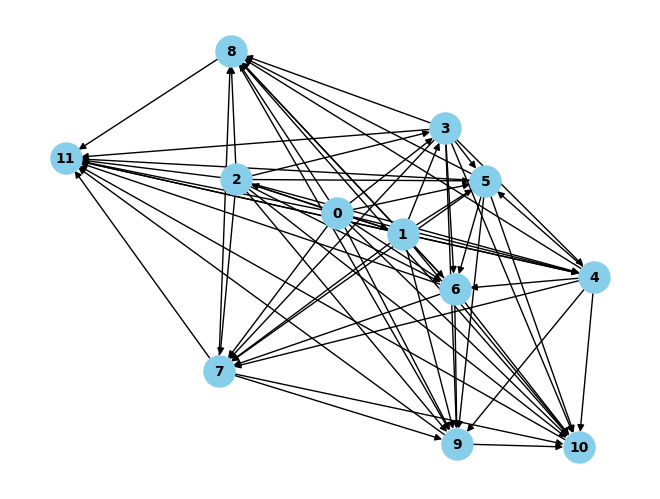

In [8]:
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [10]:
nx.community.louvain_communities(G, seed=123)

[{0, 1, 6, 7}, {3, 4, 5, 9, 10}, {2, 8, 11}]

## Learn how to use Keras and tensorflow

In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

2023-11-04 12:58:01.765041: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-04 12:58:02.256567: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-04 12:58:02.256603: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]

In [5]:
X_train.shape

(55000, 28, 28)

In [6]:
X_valid, y_valid = X_train_full[-5000:],y_train_full[-5000:]

In [7]:
X_valid.shape

(5000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
X_train,X_valid,X_test = X_train/255.,X_valid/255., X_test/255.

In [11]:
X_train.dtype

dtype('float64')

### Build a model

In [12]:
tf.random.set_seed(42)

In [13]:
model = tf.keras.Sequential()

2023-11-04 13:07:37.706983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-04 13:07:37.707082: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-04 13:07:37.707117: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (win002.hpc.in.bmrc.ox.ac.uk): /proc/driver/nvidia/version does not exist
2023-11-04 13:07:37.708268: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model

In [16]:
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [23]:
hidden1 = model.layers[1]

In [24]:
hidden1.name

'dense'

In [25]:
model.get_layer('dense')

In [27]:
weights,biases = hidden1.get_weights()

In [28]:
type(weights)

numpy.ndarray

In [29]:
weights.shape

(784, 300)

In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [31]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7220 - accuracy: 0.7649 - val_loss: 0.4959 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4825 - accuracy: 0.8331 - val_loss: 0.4561 - val_accuracy: 0.8384
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4369 - accuracy: 0.8478 - val_loss: 0.4233 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4121 - accuracy: 0.8562 - val_loss: 0.3964 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3911 - accuracy: 0.8629 - val_loss: 0.3884 - val_accuracy: 0.8618
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3751 - accuracy: 0.8691 - val_loss: 0.3906 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3629 - accuracy: 0.8713 - val_loss: 0.3705 - val_accuracy

In [32]:
type(history)

keras.callbacks.History

In [33]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [34]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [35]:
history.history

{'loss': [0.7220436930656433,
  0.4824713170528412,
  0.43688449263572693,
  0.41214630007743835,
  0.39105069637298584,
  0.37510666251182556,
  0.36293289065361023,
  0.3515531122684479,
  0.34076106548309326,
  0.3307875990867615,
  0.32248005270957947,
  0.3145117163658142,
  0.3071031868457794,
  0.30024799704551697,
  0.29380178451538086,
  0.28680941462516785,
  0.2825373113155365,
  0.27591708302497864,
  0.27105581760406494,
  0.26641565561294556,
  0.26140710711479187,
  0.25638970732688904,
  0.25194916129112244,
  0.24683190882205963,
  0.2427404671907425,
  0.23913021385669708,
  0.23387159407138824,
  0.23126818239688873,
  0.22658641636371613,
  0.2233859747648239],
 'accuracy': [0.7648727297782898,
  0.8331454396247864,
  0.8478000164031982,
  0.856218159198761,
  0.8629090785980225,
  0.8691090941429138,
  0.871254563331604,
  0.8755818009376526,
  0.8791818022727966,
  0.8815454840660095,
  0.885345458984375,
  0.887218177318573,
  0.8906000256538391,
  0.892309069633

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

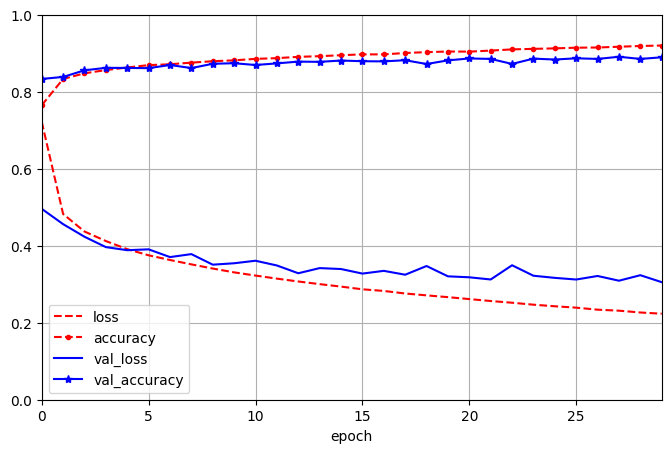

In [38]:
pd.DataFrame(history.history).plot(figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel='epoch',style=['r--','r--.','b-','b-*'])
plt.show()

In [39]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3251 - accuracy: 0.8856


[0.3251431882381439, 0.8855999708175659]

In [40]:
X_new = X_test[:3]

In [41]:
y_proba = model.predict(X_new)

y_proba.round(2)

1/1 [==============================] - 0s 219ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = y_proba.argmax(axis=-1)

In [43]:
y_pred

array([9, 2, 1])

### Build Complex Models Using the Functional API

In [45]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30,activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30,activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_],outputs=[output])

In [46]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 normalization (Normalization)  (None, 28, 28)       57          ['input_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 28, 30)       870         ['normalization[0][0]']          
                                                                                                  
 dense_4 (Dense)                (None, 28, 30)       930         ['dense_3[0][0]']                
                                                                                              

### Subclassing API

In [47]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self,units=30,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units,activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units,activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self,inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide,hidden2])
        output = self.main_otput(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output
    
model = WideAndDeepModel(30,activation="relu",name="my_cool_model")

### On tensorflow dataloader

In [7]:
import tensorflow as tf
X = tf.range(10)
print(X)
dataset = tf.data.Dataset.from_tensor_slices(X)
print(dataset)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


In [3]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
X_nested = {"a":([1,2,3],[4,5,6]),"b":[7,8,9]}
dataset = tf.data.Dataset.from_tensor_slices(X_nested)
for item in dataset:
    print(item)

{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


2023-11-06 11:17:59.769306: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


In [6]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [4]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


2023-11-06 17:21:52.917276: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


In [5]:
dataset = dataset.map(lambda x:x * 2)
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


#### About shuffling the data

In [6]:
dataset = tf.data.Dataset.range(10).repeat(2)
for item in dataset:
    print(item)
print('################')
dataset = dataset.shuffle(buffer_size=4,seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
################
tf.Tensor([1 4 2 3 5 0 6], shape=(7,), dtype=int64)
tf.Tensor([9 8 2 0 3 1 4], shape=(7,), dtype=int64)
tf.Tensor([5 7 9 6 7 8], shape=(6,), dtype=int64)


2023-11-06 17:27:54.715713: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2023-11-06 17:27:54.722487: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


### Shuffling the Data

In [11]:
dataset = tf.data.Dataset.range(10).repeat(2)
dataset = dataset.shuffle(buffer_size=4,seed=43).batch(7)
for item in dataset:
    print(item)

tf.Tensor([3 2 1 6 4 7 8], shape=(7,), dtype=int64)
tf.Tensor([0 5 9 2 0 3 6], shape=(7,), dtype=int64)
tf.Tensor([1 7 8 5 4 9], shape=(6,), dtype=int64)


2023-11-10 11:07:06.402865: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


### Understand how Rukuang generated the simulation data

Let's use Rukuang's code.

In [28]:
print(len(time_series))
print(time_series[0].shape)


10
(25600, 40)


In [27]:
import os
import numpy as np
from osl_dynamics import data, simulation
from osl_dynamics.inference import tf_ops
from osl_dynamics.models.hmm import Config, Model
from osl_dynamics.utils import plotting
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

train = False
n_subjects = 10
n_states_list = np.array([2, 3, 4, 5, 6, 7])
n_folds = 5
#results_dir = "/well/woolrich/users/tjo747/python/sehmm/results/n_modes/hmm_vs_hmm"
#os.makedirs(results_dir, exist_ok=True)

tf_ops.gpu_growth()


time_series = []
for i in range(n_subjects):
    sim = simulation.HMM_MVN(
        n_samples=25600,
        n_states=4,
        n_channels=40,
        trans_prob="sequence",
        stay_prob=0.9,
        means="zero",
        covariances="random",
        random_seed=123,
    )
    time_series.append(sim.time_series)

training_data = data.Data(time_series,load_memmaps=True)

Loading files: 100%|████████████████████████████| 10/10 [00:00<00:00, 57.04it/s]


In [29]:
print(type((training_data.arrays)[0]))

<class 'numpy.memmap'>


### Now it's time to understand sklearn cross validation.

In [37]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True,random_state=42)

In [38]:
for i, (train_index, test_index) in enumerate(kf.split(range(20))):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")


Fold 0:
  Train: index=[ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 19]
  Test:  index=[ 0  1 15 17]
Fold 1:
  Train: index=[ 0  1  2  4  6  7  9 10 12 13 14 15 16 17 18 19]
  Test:  index=[ 3  5  8 11]
Fold 2:
  Train: index=[ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 17 19]
  Test:  index=[ 2 13 16 18]
Fold 3:
  Train: index=[ 0  1  2  3  5  6  7  8 10 11 13 14 15 16 17 18]
  Test:  index=[ 4  9 12 19]
Fold 4:
  Train: index=[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 19]
  Test:  index=[ 6  7 10 14]


### Understand the relationship between "true" states and inferred states

This is really important. We have generated the data using ground truth with 4 states. Our model has states as many as 11. So how will these states look like?

In [30]:
import numpy as np
true_dir = './results_HCP_202311_no_mean/HMM_ICA_50_state_4/'
true_means = np.load(f'{true_dir}state_means.npy')
true_correlations = np.load(f'{true_dir}state_correlations.npy')
print(true_means.shape)
print(true_correlations.shape)

Object `like` not found.


In [10]:
n_states = 11
fit_dir = f'./results_simulation_202311_no_mean/HMM_ICA_50_state_{n_states}/'
fit_means = np.load(f'{fit_dir}state_means.npy')
fit_correlations = np.load(f'{fit_dir}state_correlations.npy')
print(fit_means.shape)
print(fit_correlations.shape)

(11, 50)
(11, 50, 50)


In [11]:
from rotation.utils import twopair_riemannian_distance, twopair_vector_correlation

In [12]:
import seaborn as sns

/well/win-fmrib-analysis/users/uap971/conda/skylake/envs/osld/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/well/win-fmrib-analysis/users/uap971/conda/skylake/envs/osld/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/well/win-fmrib-analysis/users/uap971/conda/skylake/envs/osld/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

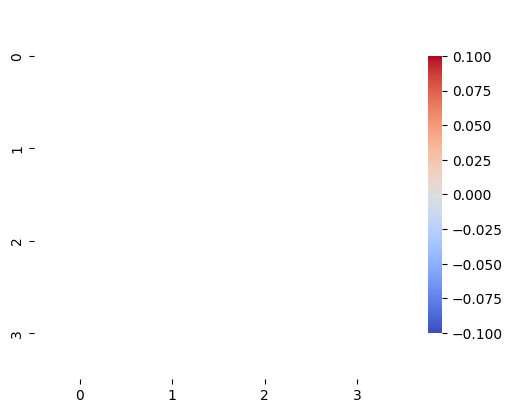

In [13]:
true_mean_correlation = twopair_vector_correlation(true_means,true_means)
sns.heatmap(true_mean_correlation, cmap="coolwarm", square=True,
                linewidths=.5, cbar_kws={"shrink": 0.75}, annot=True, fmt=".2f")

<Axes: >

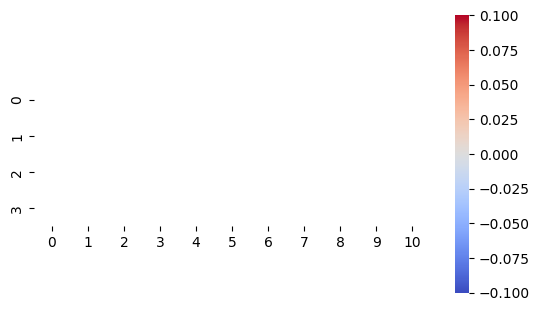

In [14]:
mean_correlation = twopair_vector_correlation(true_means,fit_means)
sns.heatmap(mean_correlation, cmap="coolwarm", square=True,
                linewidths=.5, cbar_kws={"shrink": 0.75}, annot=True, fmt=".2f")

Computing Riemannian distances: 100%|████████████| 4/4 [00:00<00:00, 361.48it/s]


<Axes: >

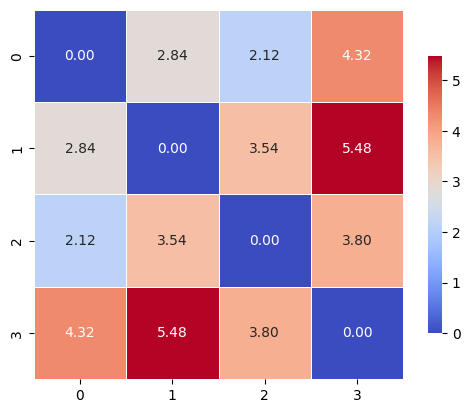

In [15]:
true_correlation_distance = twopair_riemannian_distance(true_correlations,true_correlations)
sns.heatmap(true_correlation_distance, cmap="coolwarm", square=True,
                linewidths=.5, cbar_kws={"shrink": 0.75}, annot=True, fmt=".2f")

Computing Riemannian distances: 100%|████████████| 4/4 [00:00<00:00, 203.96it/s]


<Axes: >

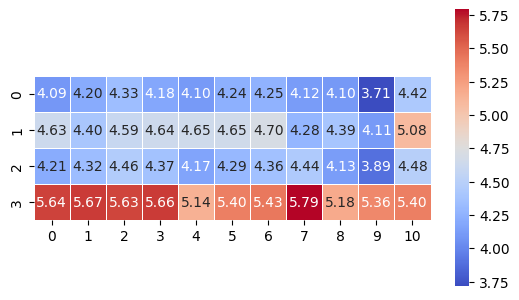

In [16]:
correlation_distance = twopair_riemannian_distance(true_correlations,fit_correlations)
sns.heatmap(correlation_distance, cmap="coolwarm", square=True,
                linewidths=.5, cbar_kws={"shrink": 0.75}, annot=True, fmt=".2f")

### Calculate the free energy

In [1]:
from rotation.analysis import comparison_analysis
models = ['HMM']
list_channels = [50,200,300]
list_states = [2,3,4,5,6,7,8,10,11]
result_dir = './results_simulation_202311_no_mean/'
save_dir = f'{result_dir}comparison/'
comparison_analysis(models,list_channels,list_states,result_dir,save_dir)

/well/win-fmrib-analysis/users/uap971/conda/skylake/envs/osld/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
for n_state in n_states:
    

SyntaxError: incomplete input (390902673.py, line 2)

### Calculate the fractional occupancy across different number of states

In [9]:
import numpy as np

def fo_correlation(fo:np.ndarray):
    # Calculate the fractional occupancy of different fo vectors
    # Assuming 'data' is your numpy array with shape (N, M) N vectors with length M

    # Calculate the correlation matrix
    correlation_matrix = np.corrcoef(fo.T, rowvar=False)

    # Exclude the diagonal elements (self-correlations) and get the upper triangular part
    upper_triangle = np.triu(correlation_matrix, k=1)

    # Count the number of non-zero elements in the upper triangle
    num_pairs = np.count_nonzero(upper_triangle)
 
    # Calculate the sum of all pairwise correlations
    sum_of_correlations = np.sum(upper_triangle)

    # Calculate the average pairwise correlation
    return sum_of_correlations / num_pairs

In [12]:
states = [2,3,4,5,6,7,8,9,10,11]
fo_correlations = np.zeros((10,5))
for i in range(len(states)):
    print(f'i={i}')
    for j in range(5):
        fo = np.load(f'./results_simulation_202311_toy_2/HMM_ICA_2_state_{states[i]}/cross_validation_{j}/validation/fo.npy')
        print(fo_correlation(fo))
        fo_correlations[i,j] = fo_correlation(fo)
print(np.mean(fo_correlations,axis=1))

i=0
0.042105263157894736
0.21052631578947367
-0.042105263157894736
0.8
nan
i=1
0.9183370386832441
0.9463488740095206
0.9411147483720742
0.9479281312823751
0.9556415158536743
i=2
0.9511191383429114
0.9556662976776074
0.948607280170677
0.9669538225835946
0.9240976070927012
i=3
0.9375842311066614
0.9525775952206605
0.9699362796469595
0.9542083909222998
0.9135600820495006
i=4
0.9111264550715703
0.9491493528236157
0.9634356466876499
0.9713298524011053
0.9367415043867453
i=5
0.9340361617828553
0.9626198044627088
0.9641395686266944
0.9551746258113176
0.9526132969356207
i=6
0.949777726880377
0.9595423443698502
0.9631031288761055
0.9696107537292914
0.9202475966719372
i=7
0.9410888269148104
0.9568535377496098
0.9708032262313706
0.9375470465690332
0.9574928518485503
i=8
0.949532571760413
0.9371033825853317
0.9615600972648601
0.9694784170409859
0.9110265025318101
i=9
0.9541858315465755
0.957618093117654
0.9626041581868663
0.9713708376961047
0.9536545075497675
[       nan 0.94187406 0.94928883 0.94

In [10]:
test_fo = np.array([[0.3,0.5,0.2],[0.31,0.49,0.2]])
print(fo_correlation(test_fo))

0.9986660732168026


In [3]:
import numpy as np
import json
states = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
free_energy = np.zeros((15,5))
for i in range(len(states)):
    print(f'i={i}')
    for j in range(5):
        with open(f'./results_simulation_202311_toy_5/HMM_ICA_25_state_{states[i]}/cross_validation_{j}/metrics.json', 'r') as file:
        # Load the JSON data from the file
            data = json.load(file)
        print(data['free_energy'])
        free_energy[i,j] = data ['free_energy']
print(np.mean(free_energy,axis=1))

i=0
18820.51122430424
18782.153813231864
18780.841405648996
18775.62434233668
18767.98849251772
i=1
18724.1065514451
18733.49469636096
18738.084964307363
18715.404912188344
18718.402158949175
i=2
18722.885068781037
18696.135788137897
18705.13166627112
18693.672438870202
18678.349688922415
i=3
18668.82389817432
18679.142361001654
18683.204304575465
18671.608178990136
18674.836264112902
i=4
18671.705090399613
18689.503478831884
18680.233481246483
18670.97798611928
18677.027130241506
i=5
18689.107597432627
18671.14019175027
18668.723368922827
18667.38634036229
18659.258738979228
i=6
18662.602186571345
18669.79750533006
18676.8635364364
18663.506920928776
18655.42425720338
i=7
18664.66346765958
18702.333462930077
18669.004252332907
18673.91737320727
18651.488141422025
i=8
18658.82845534392
18666.882401369206
18664.032669724565
18662.826929013587
18647.9126888127
i=9
18655.47791142228
18659.068787866043
18665.929507294004
18676.623428440722
18647.32099139024
i=10
18660.02333126184
18655.658

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate mean and standard deviation along axis 1 (across the 5 repetitions)
mean_free_energy = np.mean(free_energy, axis=1)
std_dev_free_energy = np.std(free_energy, axis=1)

# Number of states (assuming it ranges from 2 to 16)
num_states = np.arange(2, 17)

# Plotting the mean free energy with error bars
plt.errorbar(num_states, mean_free_energy, yerr=std_dev_free_energy, fmt='o-', label='Free Energy')

# Customize the plot
plt.title('Free Energy vs Number of States')
plt.xlabel('Number of States')
plt.ylabel('Free Energy')
plt.grid(True)
plt.legend()
plt.savefig('./temp_plot_20231121/free_energy.pdf')
plt.savefig('./temp_plot_20231121/free_energy.jpg')
plt.close()



### Plot the reproducibility analysis for new data

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory path
base_directory = './results_simulation_202311_toy_5/'

# Number of states range
num_states_range = np.arange(2, 17)

# List to store average diagonal values
average_diagonal_values = []

# Loop through different numbers of states
for n_state in num_states_range:
    # File path
    file_path = os.path.join(base_directory, f'HMM_ICA_25_state_{n_state}/reproduce_analysis/FCs_fisher_correlation_reorder_split_1.npy')
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Load the 2D numpy array from the file
        data = np.load(file_path)
        
        # Calculate the average value of diagonals and append to the list
        average_diagonal = np.mean(np.diagonal(data))
        average_diagonal_values.append(average_diagonal)
    else:
        print(f"File not found for {n_state} states.")

# Plotting the average diagonal values against the number of states
plt.plot(num_states_range, average_diagonal_values, 'o-')

# Customize the plot
plt.title('Average Diagonal vs Number of States')
plt.xlabel('Number of States')
plt.ylabel('Average Diagonal Value')
plt.grid(True)
plt.savefig('./temp_plot_20231121/reproduce_analysis.pdf')
plt.savefig('./temp_plot_20231121/reproduce_analysis.jpg')
plt.close()

In [14]:
from osl_dynamics.analysis.modes import calc_trans_prob_matrix

/well/win-fmrib-analysis/users/uap971/conda/skylake/envs/osld/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
import pickle
with open('./results_simulation_202311_toy_2/HMM_ICA_2_state_5/cross_validation_0/validation/alpha.pkl','rb') as file:
    alpha = pickle.load(file)


(1200, 5)


In [17]:
alpha[0]

array([[0.20776352, 0.19857886, 0.23280662, 0.17427129, 0.1865797 ],
       [0.21297948, 0.1951258 , 0.2378353 , 0.16826051, 0.1857989 ],
       [0.2206108 , 0.19000335, 0.24536414, 0.161661  , 0.18236071],
       ...,
       [0.17803954, 0.21357319, 0.1828571 , 0.17252667, 0.2530035 ],
       [0.1780189 , 0.21357313, 0.18247892, 0.17248656, 0.2534425 ],
       [0.1794829 , 0.21233372, 0.18231668, 0.17321044, 0.25265625]],
      dtype=float32)

In [18]:
calc_trans_prob_matrix(alpha[0])

array([[0.94789579, 0.        , 0.02204409, 0.        , 0.03006012],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0625    , 0.        , 0.9       , 0.        , 0.0375    ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.02788104, 0.        , 0.00743494, 0.00185874, 0.96282528]])

In [19]:
calc_trans_prob_matrix(alpha[1])

array([[0.97667638, 0.        , 0.00874636, 0.        , 0.01457726],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.05839416, 0.        , 0.9270073 , 0.        , 0.01459854],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0212766 , 0.        , 0.0106383 , 0.        , 0.96808511]])

In [20]:
calc_trans_prob_matrix(alpha[2])

array([[0.96174863, 0.        , 0.0136612 , 0.        , 0.02459016],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.03333333, 0.        , 0.88333333, 0.        , 0.08333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01423027, 0.        , 0.00258732, 0.        , 0.98318241]])

In [21]:
calc_trans_prob_matrix(alpha[3])

array([[0.9673913 , 0.        , 0.01086957, 0.        , 0.02173913],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.04724409, 0.        , 0.93700787, 0.        , 0.01574803],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01470588, 0.        , 0.00326797, 0.        , 0.98202614]])

### Calculate the Fractional Occupancy across scans in the same subject in real data

In [26]:
save_dir = './results_202309/'
N_channels = [15,25,50,100]
N_states = [4,8,12,16,20]
fo_correlation = np.zeros((4,5))
for i in range(len(N_channels)):
    for j in range(len(N_states)):
        fo = np.load(f'{save_dir}HMM_ICA_{N_channels[i]}_state_{N_states[j]}/fo.npy')
        temp = np.zeros(1003)
        for k in range(1003):
            temp[k] = np.corrcoef(fo[4*k+1,:],fo[4*k+2,:])[0,1]
        fo_correlation[i,j] = np.mean(temp[k])

print(fo_correlation)

[[0.97950602 0.95918963 0.93670589 0.86264682 0.53929757]
 [0.99130442 0.9369285  0.88698215 0.8225825  0.75641117]
 [0.97339019 0.98070914 0.93987138 0.89433092 0.88025788]
 [0.952394   0.95726558 0.92490503 0.8963217  0.9219986 ]]


In [27]:
save_dir = './results_simulation_202311_no_mean/'
N_states = [2,3,4,5,6,7,8,9,10,11]
for N_state in N_states:
    print(f'Number of states: {N_state}')
    for i in range(5):
        state_covariances = np.load(f'{save_dir}HMM_ICA_2_state_{N_state}/cross_validation_{i}/state_covariances.npy')
        print(state_covariances)

Number of states: 2
[[[1.08675    0.79293466]
  [0.79293466 0.9776847 ]]

 [[0.9148042  0.8080214 ]
  [0.8080214  1.0383565 ]]]
[[[1.0810381  0.8155787 ]
  [0.8155787  1.0047741 ]]

 [[0.92099375 0.7886471 ]
  [0.7886471  1.0076351 ]]]
[[[0.93030304 0.77806693]
  [0.77806693 0.9832886 ]]

 [[1.0721947  0.8260784 ]
  [0.8260784  1.0260663 ]]]
[[[1.0838544  0.784845  ]
  [0.784845   0.95867985]]

 [[0.9233475  0.81727713]
  [0.81727713 1.0550208 ]]]
[[[1.095637   0.81208014]
  [0.81208014 0.99377495]]

 [[0.90951    0.7931748 ]
  [0.7931748  1.0220174 ]]]
Number of states: 3
[[[1.1032157  0.7987267 ]
  [0.7987267  0.9879487 ]]

 [[0.8952596  0.79460204]
  [0.79460204 1.0230927 ]]

 [[1.0007254  0.8182104 ]
  [0.8182104  1.0128049 ]]]
[[[1.0669298  0.82418317]
  [0.82418317 1.0236919 ]]

 [[1.0958679  0.81990016]
  [0.81990016 1.0085359 ]]

 [[0.8995982  0.7878066 ]
  [0.7878066  1.0147293 ]]]
[[[1.0885408  0.80925983]
  [0.80925983 1.0021284 ]]

 [[0.9954629  0.8204736 ]
  [0.8204736  1.

FileNotFoundError: [Errno 2] No such file or directory: './results_simulation_202311_no_mean/HMM_ICA_2_state_11/cross_validation_1/state_covariances.npy'

In [29]:
save_dir = './results_simulation_202311_toy_2/'
N_states = [2,3,4,5,6,7,8,9,10,11]
for N_state in N_states:
    print(f'Number of states: {N_state}')
    for i in range(5):
        state_correlations = np.load(f'{save_dir}HMM_ICA_2_state_{N_state}/cross_validation_{i}/state_correlations.npy')
        print(state_correlations[:,0,1])

Number of states: 2
[ 0.05378785 -0.05817798]
[ 0.03055509 -0.03699611]
[ 0.03142449 -0.053673  ]
[ 0.00698425 -0.01987016]
[-0.07265587  0.05860319]
Number of states: 3
[ 0.0032953   0.02264835 -0.03192652]
[ 0.00457314  0.04954706 -0.05906602]
[ 0.06761466 -0.0995445   0.03209297]
[-0.03605026  0.0521932  -0.05851068]
[-0.06545039 -0.05777635  0.07059249]
Number of states: 4
[-0.04064161  0.06690485  0.07405905 -0.08863751]
[ 0.02542547  0.02809798  0.0671682  -0.08260437]
[ 0.05866564  0.05036159 -0.0081642  -0.09026714]
[ 0.04701238 -0.07437423 -0.06356851  0.05871381]
[-0.05338547 -0.07001888  0.03161782  0.05346838]
Number of states: 5
[-0.08420586  0.06099431 -0.08054513  0.04679568  0.08057624]
[ 0.07587091 -0.0709579  -0.05981565 -0.06444271  0.06637251]
[-0.0656861   0.06845136 -0.05104404  0.04163178 -0.07282606]
[ 0.07013366 -0.09021921 -0.03429725 -0.06053928  0.05789986]
[ 0.02650632 -0.07583283  0.06019732 -0.0878945   0.06101407]
Number of states: 6
[ 0.06913672 -0.0744

In [31]:
save_dir = './results_simulation_202311_toy_4/'
N_states = [7,8,9,10,11]
for N_state in N_states:
    print(f'Number of states: {N_state}')
    for i in range(5):
        state_correlations = np.load(f'{save_dir}HMM_ICA_2_state_{N_state}/cross_validation_{i}/state_correlations.npy')
        print(state_correlations[:,0,1])

Number of states: 7
[ 0.00977522 -0.00216067 -0.04186209 -0.00309481 -0.01425217  0.00180625
 -0.00749647]
[ 0.00697951 -0.02204215 -0.01073844 -0.00860576 -0.00532291 -0.0174249
 -0.00679664]
[ 0.00836213 -0.01460998  0.02311867  0.01421786 -0.02223931  0.00256739
 -0.03726145]
[ 0.00063448 -0.04301171 -0.01582496 -0.00191165 -0.02111614  0.01215602
  0.01461784]
[-0.0091382  -0.01258997 -0.02721128 -0.01043992  0.00412478 -0.003901
  0.00160206]
Number of states: 8
[ 0.02120858  0.00138292 -0.00860462 -0.04425818 -0.02230405 -0.01213971
  0.01356055 -0.01442865]
[-0.00314609 -0.0276848  -0.02269739 -0.01341339  0.00860837 -0.0143698
  0.00391661 -0.00491389]
[ 0.00709645 -0.00814363  0.00938956 -0.00922521 -0.01709046  0.00981777
 -0.01093454 -0.01117289]
[-3.04418802e-03 -1.06103225e-02  1.50493262e-02 -5.17292414e-03
 -5.50436052e-05 -2.81314943e-02 -1.07052019e-02 -1.92632992e-02]
[ 0.01360544 -0.03258251  0.00748951 -0.02245267 -0.02273977  0.01826198
 -0.01254019 -0.01618685]
Nu

### Generate some real time series

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir ='./data/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/100307.txt'
data = np.loadtxt(data_dir)
save_dir = './temp_plot_202311_grey/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
print(data.shape)

(4800, 15)


In [4]:
T, N_channels = data.shape

In [5]:
for i in range(N_channels):
    plt.plot(data[:1000,i],color='grey')
    plt.savefig(f'{save_dir}time_series_{i}.pdf')
    plt.close()

In [9]:
import seaborn as sns
swc_dir = './results_202309/SWC_ICA_50/cor_swc.npy'
data = np.load(swc_dir)
cmap = sns.color_palette("RdBu_r",as_cmap=True)
for subject in range(2):
    for i in range(9):
        seaborn.heatmap(data[subject,i,:,:],vmin=-1.0,vmax=1.0,square=True,cmap=cmap,xticklabels=False,yticklabels=False,cbar=False)
        plt.savefig(f'{save_dir}swc_cor_subject_{subject}_index_{i}.pdf')
        plt.close()

### Look at your data! Check the ground truth

In [17]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
covariances = np.load('./results_HCP_202311_no_mean/HMM_ICA_25_state_8/state_covariances.npy')
correlations = np.load('./results_HCP_202311_no_mean/HMM_ICA_25_state_8/state_correlations.npy')

In [11]:
covariances.shape

(8, 25, 25)

In [12]:
from rotation.utils import pairwise_fisher_z_correlations
fisher_z = pairwise_fisher_z_correlations(correlations)


Compute Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 942.62it/s


In [13]:
fisher_z.shape

(8, 8)

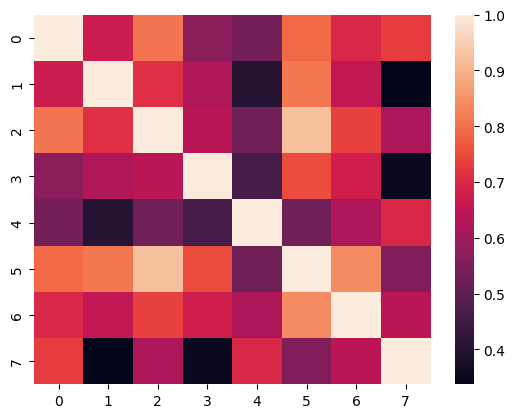

In [18]:
seaborn.heatmap(fisher_z)
plt.show()

In [22]:
correlations_fit = np.load('./results_simulation_202311_toy_5/HMM_ICA_25_state_8/state_correlations.npy')

In [23]:
correlations_fit.shape

(8, 25, 25)

Compute Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 979.92it/s


<Axes: >

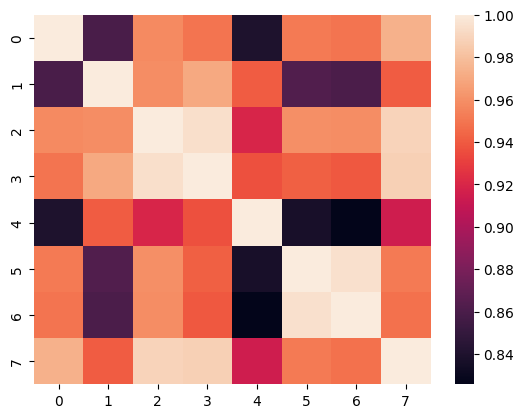

In [24]:
fisher_z_fit = pairwise_fisher_z_correlations(correlations_fit)
seaborn.heatmap(fisher_z_fit)

Compute twopair Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 46


Text(50.722222222222214, 0.5, 'Truth')

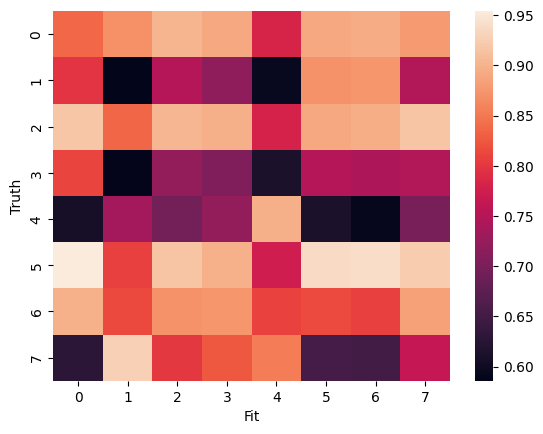

In [29]:
from rotation.utils import twopair_fisher_z_transformed_correlation
correlation_truth_fit = twopair_fisher_z_transformed_correlation(correlations,correlations_fit)
seaborn.heatmap(correlation_truth_fit)
plt.xlabel('Fit')
plt.ylabel('Truth')

In [27]:
correlation_truth_fit

array([[0.83624251, 0.87012094, 0.90166191, 0.89066245, 0.78281659,
        0.89151127, 0.89456208, 0.87908712],
       [0.79781565, 0.5858404 , 0.75091116, 0.71923662, 0.59430407,
        0.87088876, 0.87367178, 0.74740529],
       [0.91702652, 0.83562061, 0.90244091, 0.89670103, 0.78085487,
        0.89063369, 0.89573097, 0.91516119],
       [0.8103752 , 0.58814984, 0.72152761, 0.70510112, 0.61213004,
        0.7483853 , 0.74353096, 0.74833301],
       [0.6085179 , 0.73552822, 0.69491321, 0.72115188, 0.89684871,
        0.61288534, 0.59125805, 0.69913748],
       [0.95398829, 0.80609457, 0.91538969, 0.89929312, 0.77331355,
        0.93748001, 0.94056036, 0.92279008],
       [0.89885839, 0.81364203, 0.87124894, 0.87434477, 0.80985473,
        0.8150764 , 0.8061176 , 0.88355588],
       [0.6283374 , 0.92686738, 0.80095794, 0.82506889, 0.85472505,
        0.65338245, 0.65070348, 0.76353957]])

### Test with Riemannian distance

In [31]:
from rotation.utils import twopair_riemannian_distance
covariances_fit = np.load('./results_simulation_202311_toy_5/HMM_ICA_25_state_8/state_covariances.npy')

In [32]:
riemann_truth = twopair_riemannian_distance(covariances,covariances)
riemann_fit = twopair_riemannian_distance(covariances_fit,covariances_fit)
riemann_truth_fit = twopair_riemannian_distance(covariances,covariances_fit)

Computing Riemannian distances: 100%|████████████| 8/8 [00:00<00:00, 464.47it/s]


<Axes: >

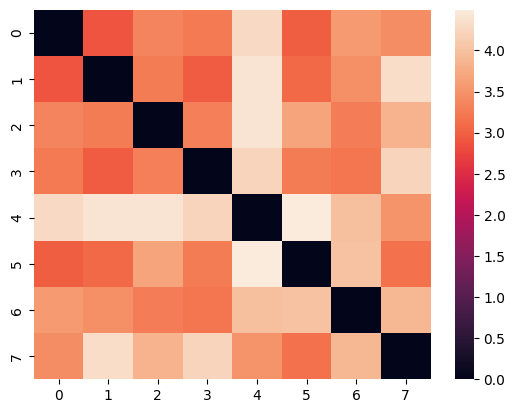

In [33]:
seaborn.heatmap(riemann_truth)

<Axes: >

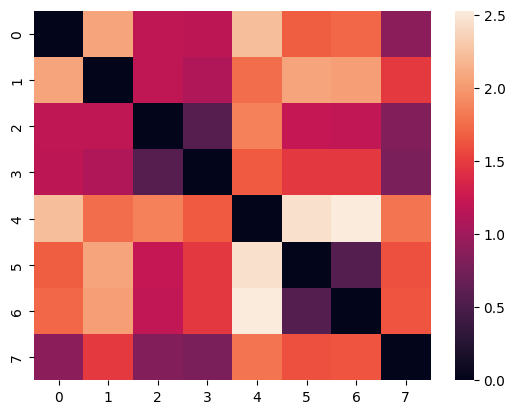

In [34]:
seaborn.heatmap(riemann_fit)

<Axes: >

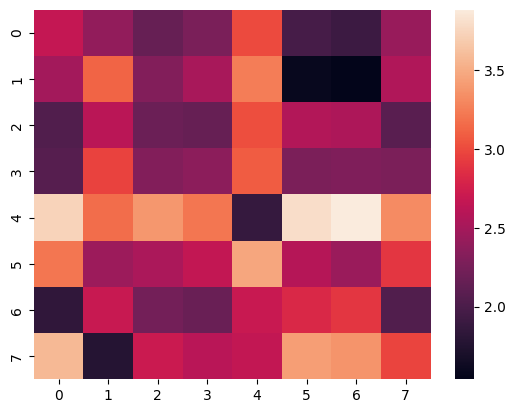

In [35]:
seaborn.heatmap(riemann_truth_fit)

In [21]:
from rotation.utils import hungarian_pair

In [38]:
fisher_indices, fisher_reordered = hungarian_pair(correlation_truth_fit)

<Axes: >

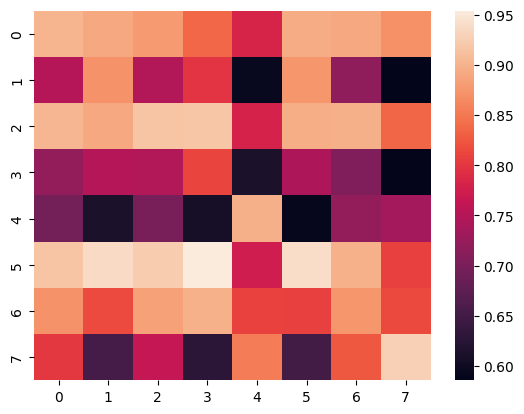

In [39]:
seaborn.heatmap(fisher_reordered)

### Check the effect of z_score

In [3]:
import pathlib
import numpy as np
from rotation.preprocessing import PrepareData
original_data = np.loadtxt('data/node_timeseries/simulation_toy_5/10001.txt')


In [4]:
original_data.shape

(120000, 25)

In [12]:
data_dir = pathlib.Path('data/node_timeseries/simulation_toy_5/')
prepare_data = PrepareData(data_dir)
subj,dataset = prepare_data.load(z_score_data=True)


Read from directory:  data/node_timeseries/simulation_toy_5
Number of subjects:  1


Loading files: 100%|███████████████████████| 100/100 [00:00<00:00, 10272.86it/s]


In [13]:
subj

['10001']

In [14]:
dataset

In [15]:
np.sum(dataset[0]!=original_data[:1200,:])

30000

In [16]:
covariances_no_z_score = np.load('./results_simulation_playground/no_z_score/HMM_ICA_25_state_8/state_covariances.npy')

In [17]:
correlations_no_z_score = np.load('./results_simulation_playground/no_z_score/HMM_ICA_25_state_8/state_correlations.npy')

Compute Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 58.45it/s]


<Axes: >

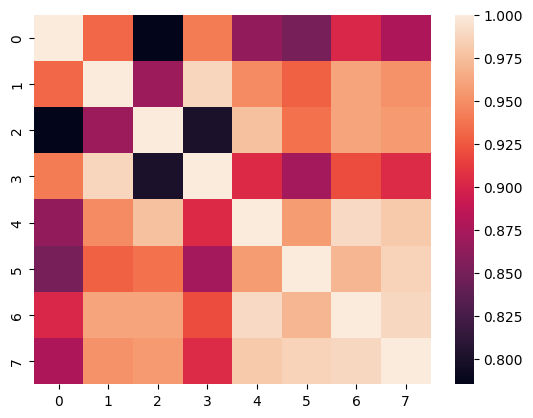

In [20]:
import seaborn
from rotation.utils import pairwise_fisher_z_correlations
seaborn.heatmap(pairwise_fisher_z_correlations(correlations_no_z_score))

In [22]:
from rotation.utils import twopair_riemannian_distance
covariances = np.load('./results_HCP_202311_no_mean/HMM_ICA_25_state_8/state_covariances.npy')
covariances_no_z_score_truth = twopair_riemannian_distance(covariances_no_z_score,covariances)

Computing Riemannian distances: 100%|█████████████| 8/8 [00:00<00:00, 50.33it/s]


<Axes: >

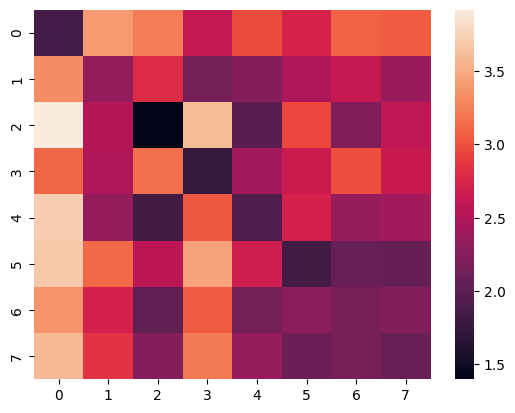

In [23]:
fisher_indices, fisher_reordered = hungarian_pair(covariances_no_z_score_truth,distance=True)
seaborn.heatmap(fisher_reordered)

### Update 29th November 2023: Using Sliding window correlation to check model simulation

#### Step 1: read in the ground-truth correlations and covariances.

In [1]:
import numpy as np
correlations_truth = np.load('./results_HCP_202311_no_mean/HMM_ICA_25_state_8/state_correlations.npy')
covariances_truth = np.load('./results_HCP_202311_no_mean/HMM_ICA_25_state_8/state_covariances.npy')

#### Step 2: read in the sliding window correlations and covariances.

In [2]:
correlations_SWC = np.load('./results_simulation_202311_toy_6/SWC_ICA_25_state_8/state_correlations.npy')
covariances_SWC = np.load('./results_simulation_202311_toy_6/SWC_ICA_25_state_8/state_covariances.npy')

In [3]:
from rotation.utils import twopair_riemannian_distance, twopair_fisher_z_transformed_correlation, hungarian_pair

/well/win-fmrib-analysis/users/uap971/conda/skylake/envs/osld/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
### Riemannian distance of ground truth correlations/covariances
riemannian_cor_truth = twopair_riemannian_distance(correlations_truth,correlations_truth)
riemannian_cov_truth = twopair_riemannian_distance(covariances_truth,covariances_truth)
riemannian_cor_SWC = twopair_riemannian_distance(correlations_SWC,correlations_SWC)
riemannian_cov_SWC = twopair_riemannian_distance(covariances_SWC,covariances_SWC)
riemannian_cor_truth_SWC = twopair_riemannian_distance(correlations_truth,correlations_SWC)
riemannian_cov_truth_SWC = twopair_riemannian_distance(covariances_truth,covariances_SWC)

Computing Riemannian distances:   0%|                     | 0/8 [00:00<?, ?it/s]
/gpfs3/well/win-fmrib-analysis/users/uap971/osl-dynamics/rotation/utils.py:427: UserWarning: Calculation of Riemannian distance failed for eps=0
  warnings.warn(f'Calculation of Riemannian distance failed for eps={eps}')
Computing Riemannian distances:   0%|                     | 0/8 [00:00<?, ?it/s]
/gpfs3/well/win-fmrib-analysis/users/uap971/osl-dynamics/rotation/utils.py:427: UserWarning: Calculation of Riemannian distance failed for eps=1e-09
  warnings.warn(f'Calculation of Riemannian distance failed for eps={eps}')
Computing Riemannian distances:   0%|                     | 0/8 [00:00<?, ?it/s]
/gpfs3/well/win-fmrib-analysis/users/uap971/osl-dynamics/rotation/utils.py:427: UserWarning: Calculation of Riemannian distance failed for eps=1e-08
  warnings.warn(f'Calculation of Riemannian distance failed for eps={eps}')
Computing Riemannian distances:   0%|                     | 0/8 [00:00<?, ?it/s]
/gpfs

ValueError: Riemannian distance failed for all eps values!

In [6]:
### Fisher-z transformed of ground truth correlations/covariances
fisher_cor_truth = twopair_fisher_z_transformed_correlation(correlations_truth,correlations_truth)
fisher_cor_SWC = twopair_fisher_z_transformed_correlation(correlations_SWC,correlations_SWC)
fisher_cor_truth_SWC = twopair_fisher_z_transformed_correlation(correlations_truth,correlations_SWC)

Compute twopair Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 43
Compute twopair Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 27
Compute twopair Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 44


<Axes: >

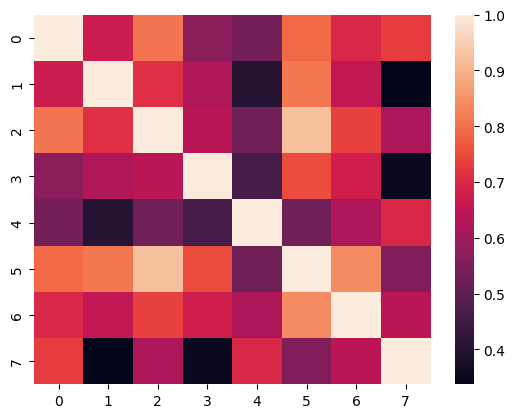

In [7]:
import seaborn
seaborn.heatmap(fisher_cor_truth)

<Axes: >

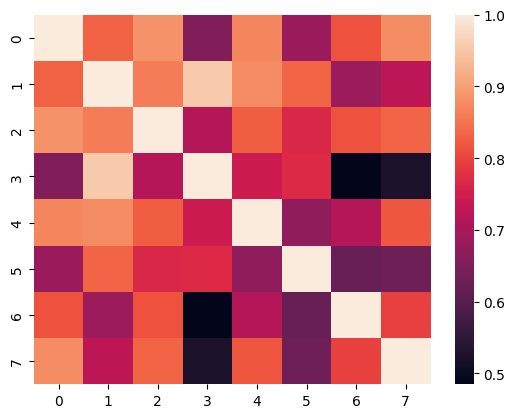

In [8]:
seaborn.heatmap(fisher_cor_SWC)

In [11]:
indices, fisher_cor_truth_SWC_reordered = hungarian_pair(fisher_cor_truth_SWC)

<Axes: >

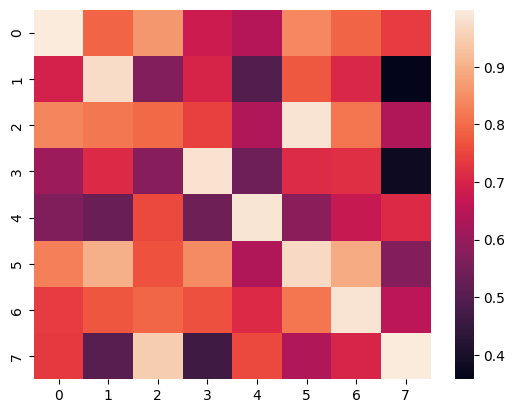

In [12]:
seaborn.heatmap(fisher_cor_truth_SWC_reordered)

In [13]:
fisher_cor_truth_SWC_reordered

array([[0.99665347, 0.79065424, 0.86175603, 0.67923163, 0.64137114,
        0.83951469, 0.79072613, 0.73808677],
       [0.69531901, 0.97180593, 0.56825185, 0.69969413, 0.49478473,
        0.77561   , 0.70770739, 0.35748703],
       [0.83670896, 0.81624049, 0.79788602, 0.74443762, 0.63394945,
        0.98448696, 0.81566564, 0.63466101],
       [0.606599  , 0.70847455, 0.57585796, 0.98390002, 0.53809844,
        0.71286777, 0.71860203, 0.37846639],
       [0.56450886, 0.531393  , 0.75437802, 0.53637612, 0.98684594,
        0.57883474, 0.67088507, 0.71001059],
       [0.82633156, 0.89953065, 0.76747896, 0.84420265, 0.63545595,
        0.96842436, 0.89347347, 0.57129213],
       [0.73816928, 0.77253745, 0.79246946, 0.76510963, 0.71058002,
        0.81414476, 0.98449903, 0.65564675],
       [0.73440623, 0.50396578, 0.94752085, 0.462748  , 0.75510815,
        0.63700018, 0.70084349, 0.99896867]])

#### Step 3: read in the HMM states 

In [20]:
correlations_HMM = np.load('./results_simulation_202311_toy_6/HMM_ICA_25_state_8/state_correlations.npy')
covariances_HMM = np.load('./results_simulation_202311_toy_6/HMM_ICA_25_state_8/state_covariances.npy')

In [21]:
fisher_cor_HMM = twopair_fisher_z_transformed_correlation(correlations_HMM,correlations_HMM)
fisher_cor_truth_HMM = twopair_fisher_z_transformed_correlation(correlations_truth,correlations_HMM)

Compute twopair Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 42
Compute twopair Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 46


In [22]:
indices, fisher_cor_truth_HMM_reordered = hungarian_pair(fisher_cor_truth_HMM)

<Axes: >

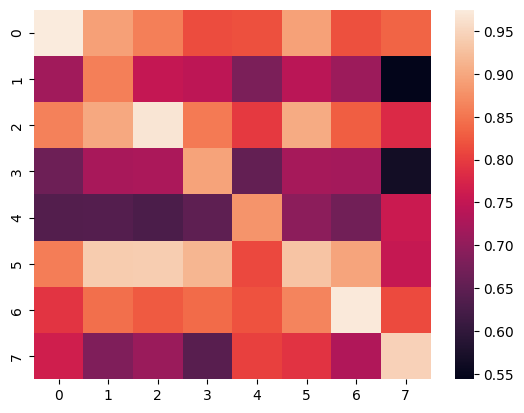

In [23]:
seaborn.heatmap(fisher_cor_truth_HMM_reordered)

<Axes: >

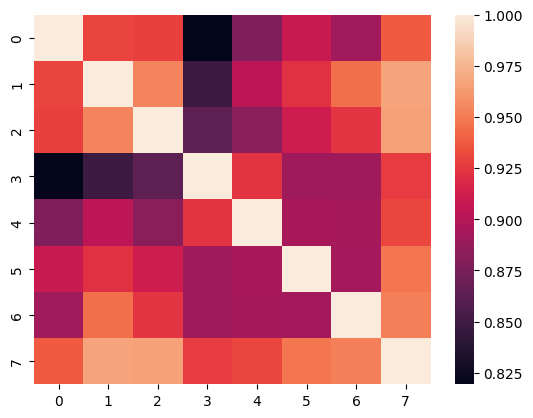

In [24]:
seaborn.heatmap(fisher_cor_HMM)

### Update 1st Dec 2023

As suggested by Chet, now let's check whether the osl-dynamics HMM inference is correct. First, check the non-trainable case.

In [13]:
import numpy as np
import seaborn
from rotation.utils import twopair_riemannian_distance, hungarian_pair

In [14]:
state_covariance_fit = np.load('./results_simulation_202311_toy_6/HMM_ICA_25_state_8_final/state_covariances.npy')
state_correlation_fit = np.load('./results_simulation_202311_toy_6/HMM_ICA_25_state_8_final/state_correlations.npy')
state_covariance_truth = np.load('./results_HCP_202311_no_mean/HMM_ICA_25_state_8/state_covariances.npy')
state_correlation_truth = np.load('./results_HCP_202311_no_mean/HMM_ICA_25_state_8/state_correlations.npy')

In [15]:
riemannian_fit_truth = twopair_riemannian_distance(state_covariance_fit,state_covariance_truth)

Computing Riemannian distances: 100%|████████████| 8/8 [00:00<00:00, 703.06it/s]


[[3.40165214 4.30717011 3.84038278 4.20373658 3.51038735 3.12401759
  3.87697419 0.2220812 ]
 [3.52225279 3.43193624 3.2468047  3.18809499 3.97682885 3.94893485
  0.27046988 3.8413184 ]
 [3.34266174 3.25839884 0.22693022 3.28144366 4.3971542  3.68080528
  3.27287083 3.84530398]
 [2.99361127 3.09763207 3.6748324  3.28287213 4.49290185 0.2408669
  4.00648284 3.13329171]
 [4.28933351 4.40521676 4.40702048 4.23416973 0.23888105 4.52361696
  3.96486466 3.53856864]
 [2.91095785 0.24518114 3.26954234 2.98285989 4.41633575 3.08779298
  3.48844738 4.34197844]
 [3.27353471 2.99365311 3.3194696  0.23079059 4.24406806 3.27762597
  3.23906169 4.25418187]
 [0.18944531 2.91233698 3.35909665 3.24848635 4.30739919 2.99555427
  3.6033023  3.45915863]]


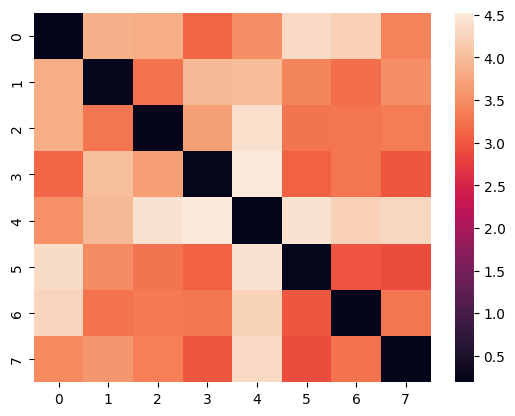

In [16]:
_, riemannian_fit_truth_reordered = hungarian_pair(riemannian_fit_truth,distance=True)
seaborn.heatmap(riemannian_fit_truth_reordered)
print(riemannian_fit_truth)

Compute Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 1076.43it/


<Axes: >

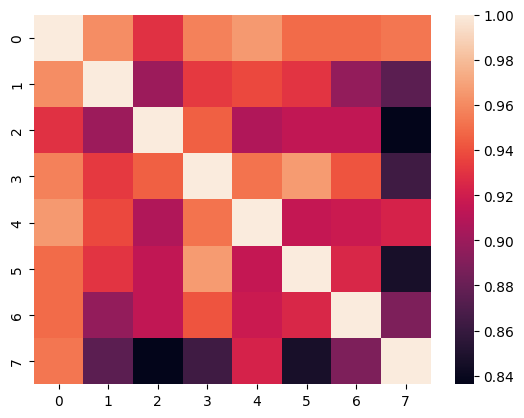

In [13]:
from rotation.utils import pairwise_fisher_z_correlations
seaborn.heatmap(pairwise_fisher_z_correlations(state_correlation_fit))

Compute Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 1026.95it/


<Axes: >

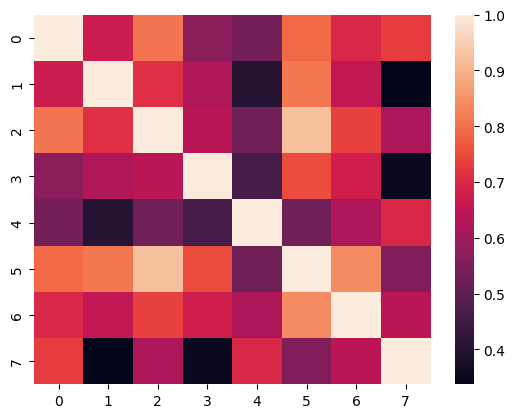

In [6]:
seaborn.heatmap(pairwise_fisher_z_correlations(state_correlation_truth))

Computing Riemannian distances: 100%|████████████| 8/8 [00:00<00:00, 675.18it/s]


<Axes: >

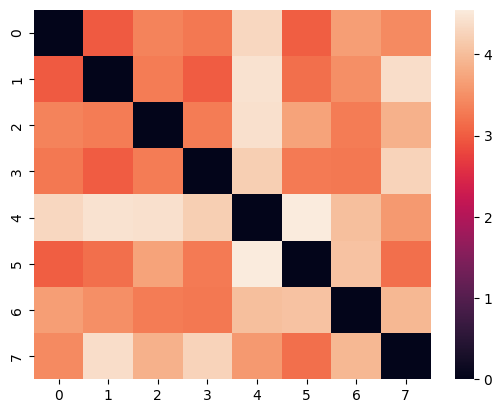

In [7]:
seaborn.heatmap(twopair_riemannian_distance(state_covariance_fit,state_covariance_fit))

In [12]:
import pickle

In [13]:
with open('./results_simulation_202311_toy_6/HMM_ICA_25_state_8/alpha.pkl','rb') as file:
    posterior = pickle.load(file)

In [48]:
posterior_hard = np.argmax(posterior[7],axis=1)
print(posterior_hard.shape)

(1200,)


In [22]:
truth = np.load('data/node_timeseries/simulation_toy_6/10001_state_time_course.npy')

In [51]:
truth_0 = np.argmax(truth[8400:9600,:],axis=1)

In [52]:
np.sum(truth_0!=posterior_hard)

1000

In [53]:
for i in range(100):
    posterior_hard = np.argmax(posterior[i],axis=1)
    truth_0 = np.argmax(truth[i*1200:i*1200+1200,:],axis=1)
    print(np.sum(truth_0!=posterior_hard))

13
4
5
13
13
5
68
14
17
18
26
12
22
19
23
10
3
10
15
5
10
14
2
10
13
17
16
3
27
11
13
18
10
6
26
23
21
17
17
31
16
20
8
43
13
18
19
17
6
18
11
25
11
20
18
10
10
25
20
16
36
12
17
21
5
14
10
5
22
36
18
18
9
10
20
14
18
12
12
17
22
11
13
10
6
13
25
12
15
13
16
35
6
8
7
25
9
12
18
18


### Understand the different training configurations and loss function

In [54]:
sequence_lengths = [600,400,200,100,50,25]
batch_sizes = [1024,512,256,128,64,32]
learning_rates = [0.0005,0.001,0.005,0.01]

In [56]:
import os
import numpy as np

In [57]:
for sequence_length in sequence_lengths:
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            if not os.path.exists(f'./results_training_config/sl_{sequence_length}_bs_{batch_size}_lr_{learning_rate}/trans_prob.npy'):
                print(f'sequence_length_{sequence_length}_batch_size_{batch_size}_learning_rate_{learning_rate}')

sequence_length_25_batch_size_32_learning_rate_0.0005
sequence_length_25_batch_size_32_learning_rate_0.001
sequence_length_25_batch_size_32_learning_rate_0.005
sequence_length_25_batch_size_32_learning_rate_0.01


### Update the state covariances after initialised training

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
from rotation.utils import cov2stdcor, pairwise_fisher_z_correlations, twopair_riemannian_distance

Compute Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 862.83it/s


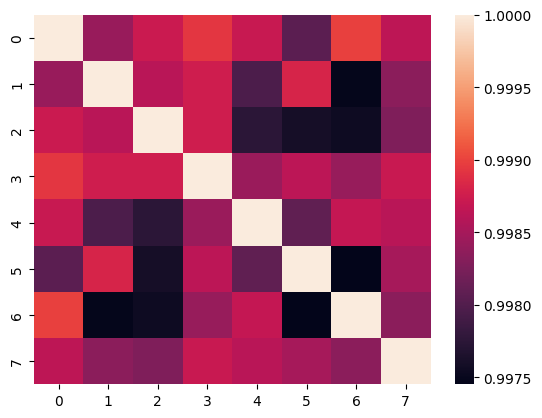

In [20]:
save_dir = './results_simulation_202311_toy_6/HMM_ICA_25_state_8_miscellaneous_real/'
n_init = 10
for i in range(1,2):
    covariances = np.load(f'{save_dir}covariances_{i}.npy')
    _, correlations = cov2stdcor(covariances)
    seaborn.heatmap(pairwise_fisher_z_correlations(correlations))
    plt.show()

### Check Chet's simulation - What these covariance matrices look like

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
from rotation.utils import twopair_riemannian_distance, pairwise_fisher_z_correlations, cov2stdcor

/well/win-fmrib-analysis/users/uap971/conda/skylake/envs/osld/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
covariances = np.load('./data/node_timeseries/simulation_toy_8/10001_state_covariances.npy')

In [3]:
_,correlations = cov2stdcor(covariances)

Computing Riemannian distances: 100%|█████████████| 5/5 [00:00<00:00, 28.93it/s]


<Axes: >

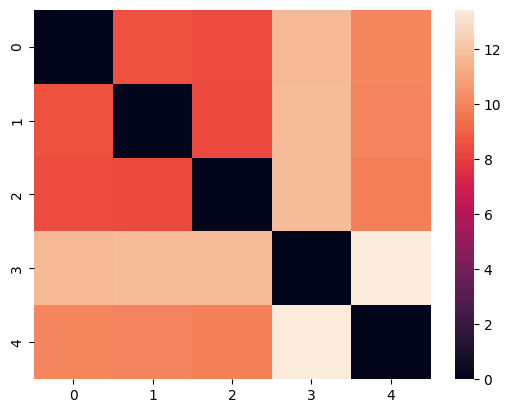

In [4]:
seaborn.heatmap(twopair_riemannian_distance(covariances, covariances))

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1758.47it/


<Axes: >

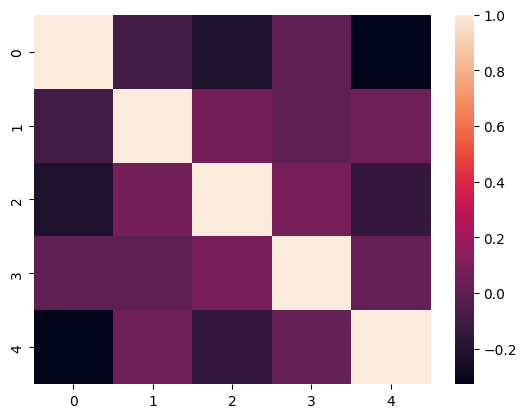

In [5]:
seaborn.heatmap(pairwise_fisher_z_correlations(correlations))

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1686.36it/


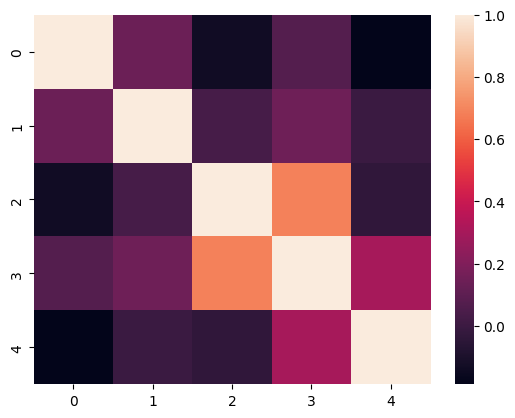

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 2539.85it/


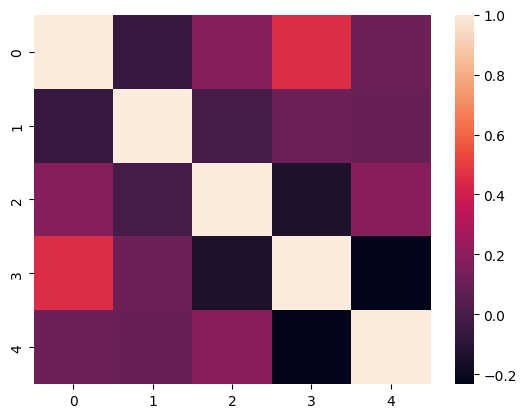

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1579.30it/


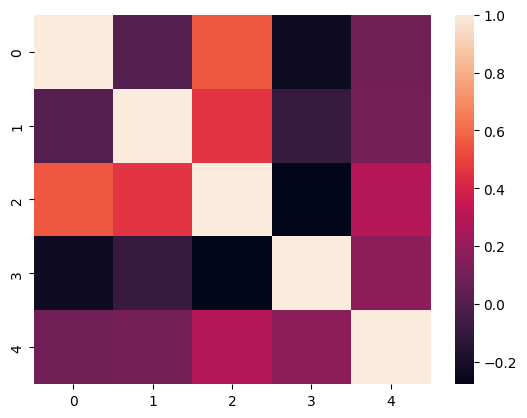

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1889.84it/


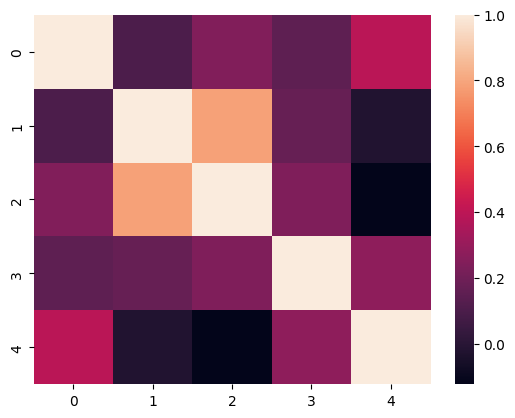

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1555.17it/


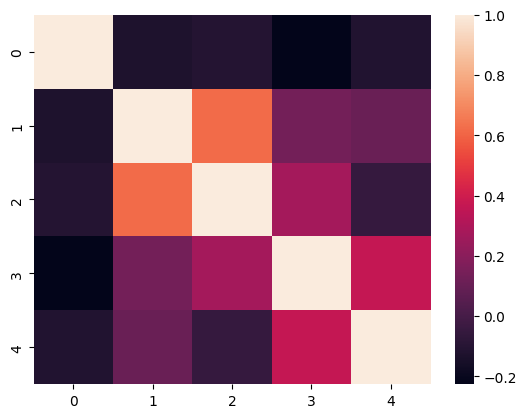

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1830.77it/


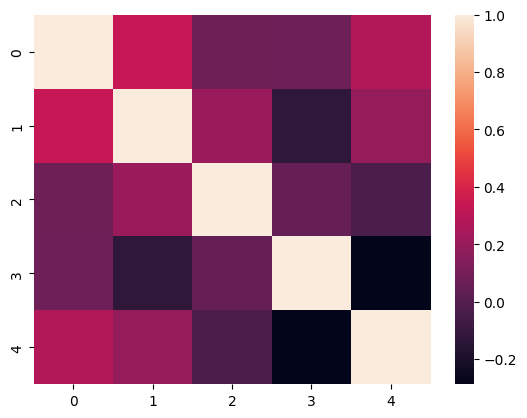

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1892.22it/


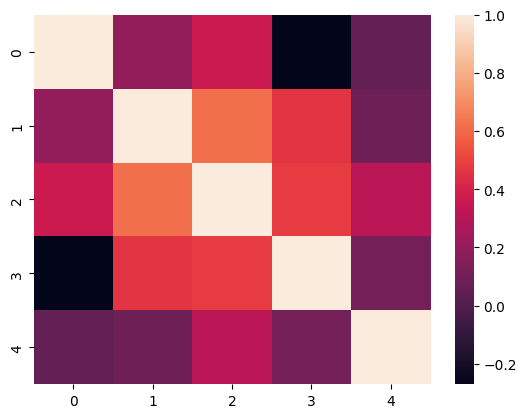

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1795.35it/


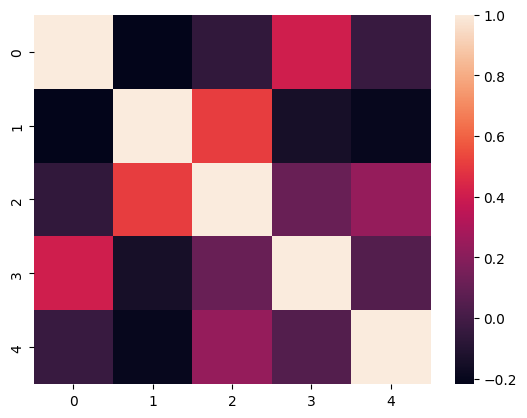

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1858.52it/


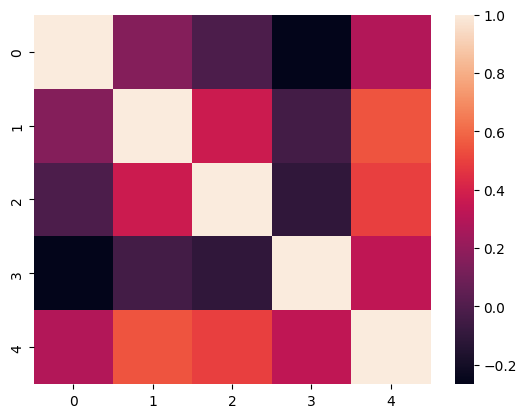

Compute Fisher-z transformated correlation: 100%|█| 5/5 [00:00<00:00, 1958.67it/


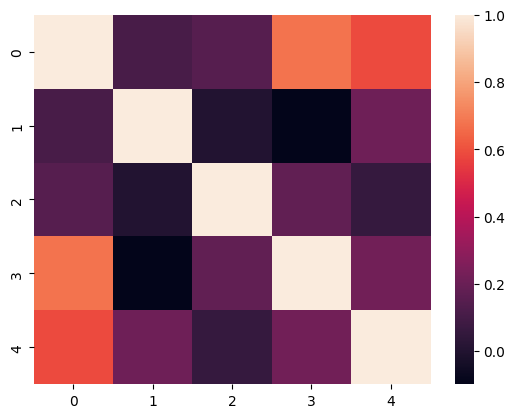

In [6]:
save_dir = './results_simulation_202311_toy_8/'
n_init = 10
for i in range(n_init):
    covariances = np.load(f'{save_dir}covariances_{i}.npy')
    _, correlations = cov2stdcor(covariances)
    seaborn.heatmap(pairwise_fisher_z_correlations(correlations))
    plt.show()

Computing Riemannian distances: 100%|███████████| 5/5 [00:00<00:00, 1592.37it/s]


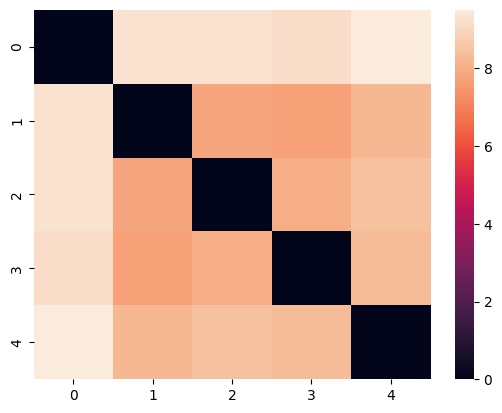

In [7]:
results_covariance = np.load(f'{save_dir}HMM_ICA_11_state_5/state_covariances.npy')
seaborn.heatmap(twopair_riemannian_distance(results_covariance,results_covariance))
plt.show()

Computing Riemannian distances: 100%|███████████| 5/5 [00:00<00:00, 1654.17it/s]


[[7.48701844 6.75399839 7.17971632 7.91314317 7.60459501]
 [5.89449839 6.6039659  6.08214241 6.20640782 3.83590764]
 [5.71553436 6.57674421 6.36538851 4.12601537 6.65066772]
 [5.14404274 6.70249356 4.57809857 6.55693776 6.41183871]
 [6.37435824 5.69786049 6.67285536 6.69623953 6.98998333]]


AttributeError: QuadMesh.set() got an unexpected keyword argument 'distance'

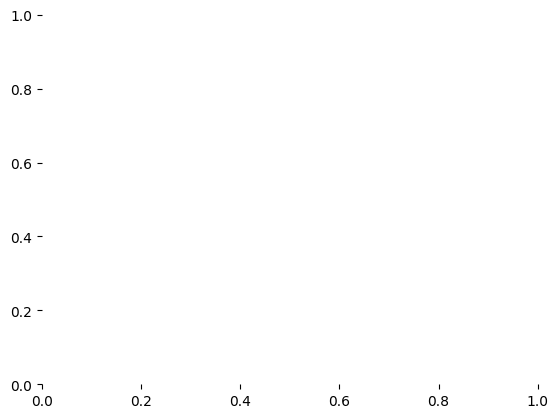

In [12]:
from rotation.utils import hungarian_pair
riem = twopair_riemannian_distance(results_covariance,covariances)
_, riem_reordered = hungarian_pair(riem)
print(riem_reordered)
seaborn.heatmap(riem_reordered,distance=True)
plt.show()

Now we have finished the training. Just look at your data!

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from rotation.utils import twopair_riemannian_distance, twopair_fisher_z_transformed_correlation, cov2stdcor,hungarian_pair

Computing Riemannian distances: 100%|████████████| 8/8 [00:00<00:00, 517.44it/s]


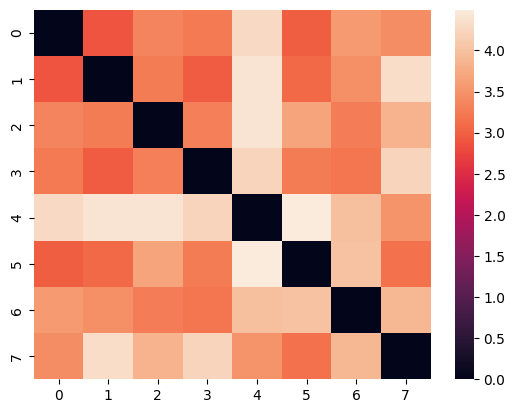

Compute twopair Fisher-z transformated correlation: 100%|█| 8/8 [00:00<00:00, 56


<Axes: >

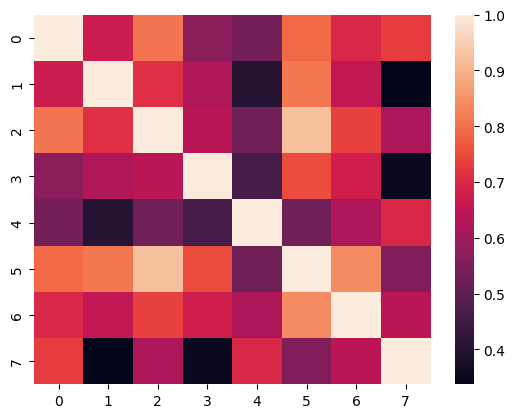

In [17]:
ground_truth_dir = './results_HCP_202311_no_mean/'
covariances_ground_truth = np.load(f'{ground_truth_dir}HMM_ICA_25_state_8/state_covariances.npy')
correlations_ground_truth = np.load(f'{ground_truth_dir}HMM_ICA_25_state_8/state_correlations.npy')
seaborn.heatmap(twopair_riemannian_distance(covariances_ground_truth,covariances_ground_truth))
plt.show()
seaborn.heatmap(twopair_fisher_z_transformed_correlation(correlations_ground_truth,correlations_ground_truth))

Computing Riemannian distances: 100%|██████████| 16/16 [00:00<00:00, 292.92it/s]


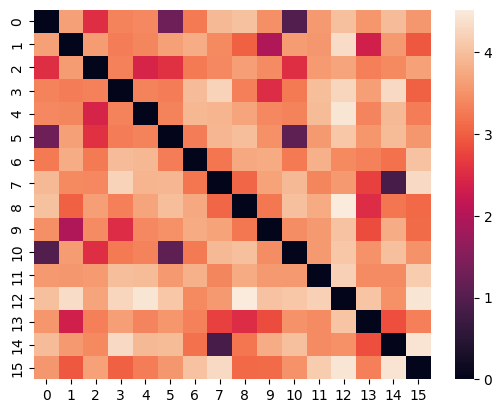

Compute twopair Fisher-z transformated correlation: 100%|█| 16/16 [00:00<00:00, 


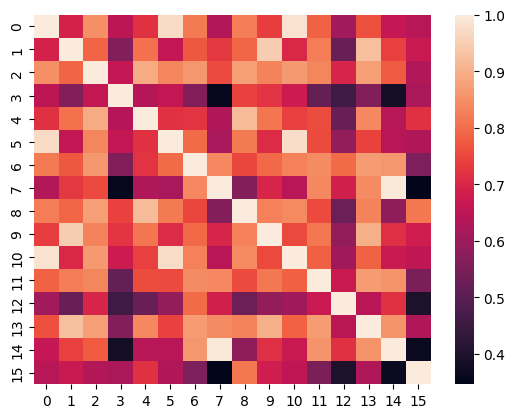

Computing Riemannian distances: 100%|██████████| 16/16 [00:00<00:00, 787.76it/s]


<Axes: >

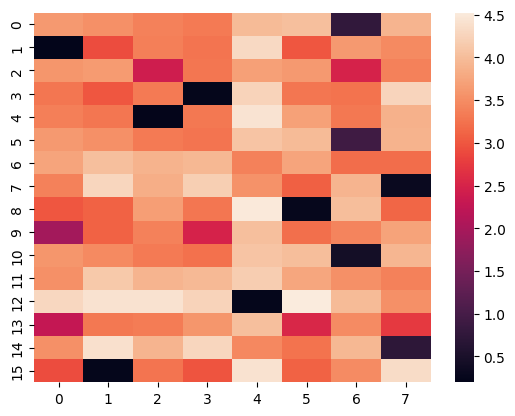

In [36]:
save_dir = './results_simulation_202311_toy_6/'
n_states = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
covariances = np.load(f'{save_dir}HMM_ICA_25_state_16/state_covariances.npy')
correlations = np.load(f'{save_dir}HMM_ICA_25_state_16/state_correlations.npy')
seaborn.heatmap(twopair_riemannian_distance(covariances,covariances))
plt.show()
seaborn.heatmap(twopair_fisher_z_transformed_correlation(correlations,correlations))
plt.show()
covariance_fit_truth = twopair_riemannian_distance(covariances,covariances_ground_truth)
seaborn.heatmap(covariance_fit_truth)

check the fractional occupancy when the states are very large

In [39]:
fo = np.load(f'{save_dir}HMM_ICA_25_state_16/fo.npy')
print(np.mean(fo,axis=0))

[0.02820833 0.17531667 0.00204167 0.12139167 0.111325   0.02111667
 0.00235833 0.10115    0.10949167 0.00215833 0.07358333 0.00185
 0.10640833 0.00259167 0.03178333 0.109225  ]


### Check the results of all training configurations

In [8]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
sequence_lengths = [25,50,100,200,400,600]
batch_sizes = [32,64,128,256,512,1024]
#learning_rates = [0.0005,0.001,0.005,0.01]
learning_rates = [0.001]

Check whether the training has finished

In [7]:
save_dir = './results_training_config/'
for sequence_length in sequence_lengths:
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            if not os.path.isfile(f'{save_dir}sl_{sequence_length}_bs_{batch_size}_lr_{learning_rate}/time.json'):
                print(f'sl_{sequence_length}_bs_{batch_size}_lr_{learning_rate}')

sl_25_bs_32_lr_0.0005
sl_25_bs_32_lr_0.001
sl_25_bs_32_lr_0.005
sl_25_bs_32_lr_0.01


/tmp/slurm-39097824/ipykernel_37046/3657015509.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(configurations, rotation=45, ha='right')


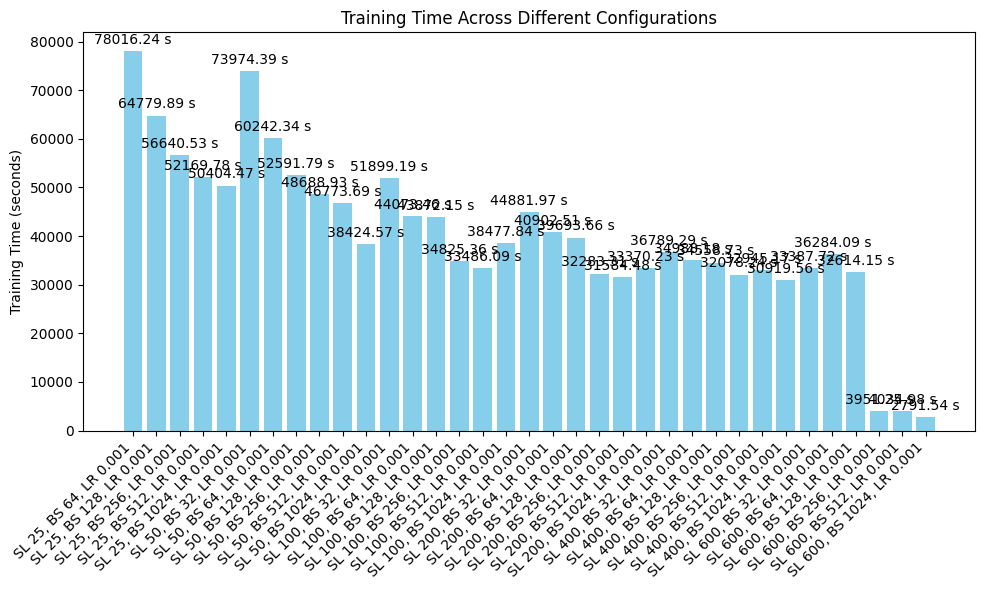

In [11]:
# Initialize lists to store data
configurations = []
durations = []

# Loop through configurations and read JSON files
for sequence_length in sequence_lengths:
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            # Skip the missing file
            if sequence_length == 25 and batch_size == 32:
                continue
            
            # Construct the file path
            file_path = f'./results_training_config/sl_{sequence_length}_bs_{batch_size}_lr_{learning_rate}/time.json'
            
            # Check if the file exists
            if os.path.exists(file_path):
                # Read the JSON file
                with open(file_path, 'r') as json_file:
                    data = json.load(json_file)
                    duration = data['duration']
                    
                    # Append data to lists
                    configurations.append(f'SL {sequence_length}, BS {batch_size}, LR {learning_rate}')
                    durations.append(duration)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(configurations, durations, color='skyblue')
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Training Time Across Different Configurations')
ax.set_xticklabels(configurations, rotation=45, ha='right')

# Add data labels
for bar, duration in zip(bars, durations):
    height = bar.get_height()
    ax.annotate(f'{duration:.2f} s', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
